# Setup
You should use the base Python installation that is installed on EURECOM Linux computer laboratory machines.  You can also use your own machines, but you'll need to check that your installation is up to date and has the same library versions as EURECOM machines.  The lab is untested for Windows environments and may require the installation of ffmpeg libraries in addition to those listed below.  The lab will allow you to listen to some audio files.  **Please be careful to adjust the volume to a safe level before listening to them.**

You should work through the laboratory executing each cell as you go by clicking on the cell and pressing <tt>shift+enter</tt>.  Do not run everything in one go.

We will need the following libraries and functionality.

In [2]:
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
from matplotlib.ticker import LinearLocator
import IPython.display
import random
import scipy
import librosa
import librosa.display
import lpc
from sklearn.cluster import KMeans
from hmmlearn import hmm

# Spectrogram analysis
The objective of the exercises in this section are to improve your intuitive understanding of frame blocking, the discrete Fourier transform, the short-term Fourier transform and of spectro-temporal decopomositions such as the <i>spectrogram</i>.

We start by defining some default parameters used for spectral analysis.

In [3]:
dsr=8000         # defaut sampling rate
dn_fft=256       # default Fourier transform size
dhop_length=128  # default hop_length

## Chirp signals
You will generate three different types of chirp signal. Two have increasing frequency, the other decreasing frequency. Two are expononential chirps, the other linear. 

### Positive exponential chirp

We'll create a 1-second exponential chirp signal starting at 1 Hz and ending at 4 kHz.

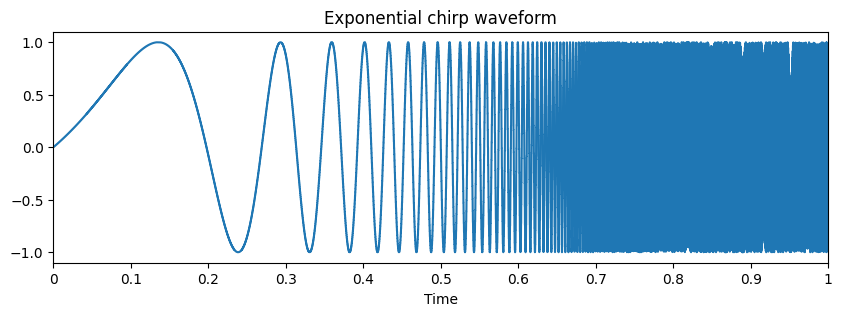

In [4]:
exponential_chirp = librosa.chirp(fmin=1, fmax=4000, sr=dsr, duration=1)

# plot the time waveform
fig, ax = plt.subplots(figsize=(10, 3))
librosa.display.waveshow(exponential_chirp,sr=dsr)
ax.set(title='Exponential chirp waveform')
ax.set_xlim([0, 1]);

Let's listen to the result.

In [7]:
IPython.display.Audio(data=exponential_chirp, rate=dsr)

**Explain why the sound seems to last less than 1 second.**

Answer: Since the signal starts off with such a low frequency that we are not able to hear, so we only hear after a certain frequency has been reached, it seems for us that the sound is less than 1 second.

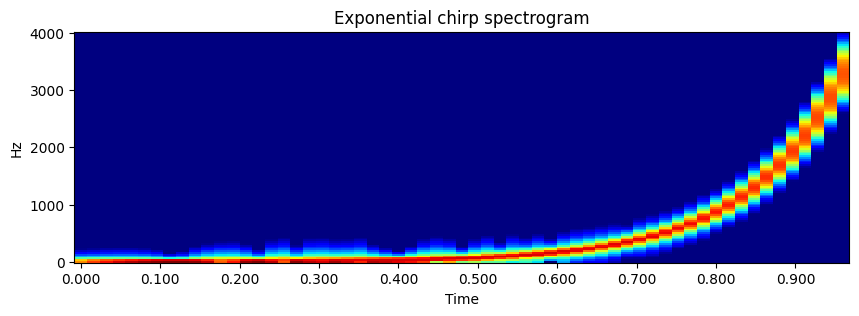

In [5]:
# plot the spectrogram
fig, ax = plt.subplots(figsize=(10, 3))
S_exponential = np.abs(librosa.stft(exponential_chirp, n_fft=dn_fft, 
                                    hop_length=dhop_length, center=False))
librosa.display.specshow(librosa.amplitude_to_db(S_exponential, ref=np.max), 
                         n_fft=dn_fft, hop_length=dhop_length,
                         sr=dsr, x_axis='time', y_axis='linear', 
                         ax=ax, cmap='jet')
ax.set(title='Exponential chirp spectrogram');

**Explain why you see such wide bands or smearing for the chirp at higher frequencies.**

Answer: As the frequency increases exponensially while the window stays at the same size, the window will capture more frequency and leads to wider frequency bands for higher frequencies.

### Negative exponential chirp

Now we'll do exactly the same, but for a chirp signal decreasing from 4 kHz down to 1 Hz.

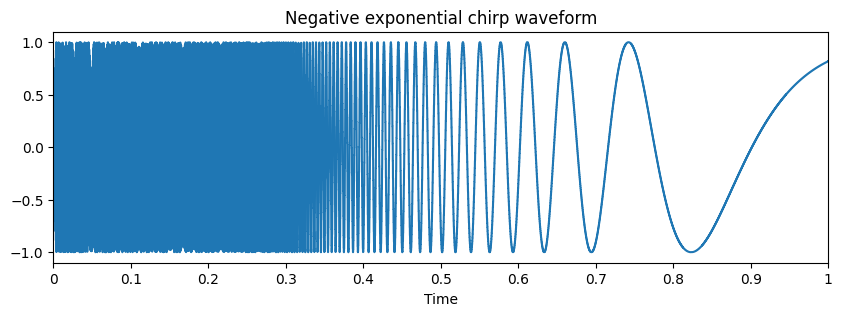

In [6]:
negative_exponential_chirp = librosa.chirp(
    fmin=4000, fmax=1, sr=dsr, duration=1)

# plot the time waveform
fig, ax = plt.subplots(figsize=(10, 3))
librosa.display.waveshow(negative_exponential_chirp,sr=dsr)
ax.set(title='Negative exponential chirp waveform')
ax.set_xlim([0, 1]);

Listen to the result.

In [7]:
IPython.display.Audio(data=negative_exponential_chirp, rate=dsr) 

**Before plotting it, think about what you would expect to see in the spectrogram.**

Answer: I expect to see the opposite of the spectogram I say earlier.

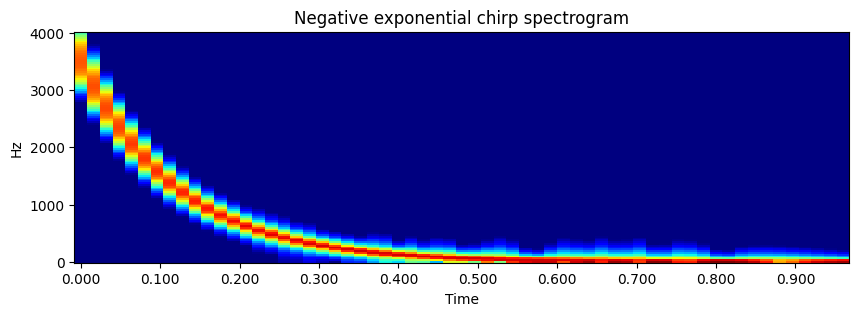

In [8]:
# plot the spectrogram
fig, ax = plt.subplots(figsize=(10, 3))
S_negative_exponential = np.abs(librosa.stft(
    negative_exponential_chirp, n_fft=dn_fft, hop_length=dhop_length,
    center=False))
librosa.display.specshow(librosa.amplitude_to_db(
    S_negative_exponential, ref=np.max), n_fft=dn_fft, 
    hop_length=dhop_length, sr=dsr, x_axis='time', 
    y_axis='linear', ax=ax, cmap='jet')
ax.set(title='Negative exponential chirp spectrogram');

 **Describe the correspondance between the chirp characteristics, the timewave form and the spectrogram.**

 We are now going from high frequencies to low, and we therefore get a plot that has the opposite shape of before. We have the same smearing as before, but now in the beginning. 

### Positive linear chirp

Now exactly the same, but for a positive, linear chirp.

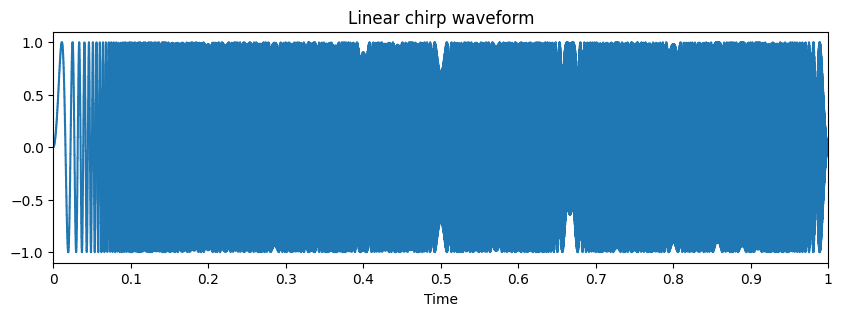

In [9]:
linear_chirp = librosa.chirp(fmin=1, fmax=4000, sr=dsr,
                             duration=1, linear=True)
# plot the time waveform
fig, ax = plt.subplots(figsize=(10, 3))
librosa.display.waveshow(linear_chirp,sr=dsr)
ax.set(title='Linear chirp waveform')
ax.set_xlim([0, 1]);

Listen to the result.

In [10]:
IPython.display.Audio(data=linear_chirp, rate=dsr) 

**Explain why the sound now seems to last the full 1 second, or at least longer than in the first two examples.**

Answer: In this case we do not have very low frequencies, which means we are able to hear all frequencies. Therefore, the sound seems to last for the full 1 second.

**Again, before plotting it, think about what you would expect to see in the spectrogram.**

Answer: Instead of an expontnial shape, I expect it to be linear as we have a linear shirp.

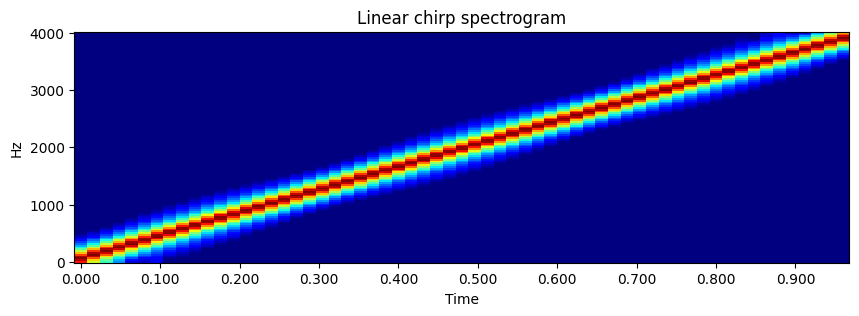

In [11]:
# plot the spectrogram
fig, ax = plt.subplots(figsize=(10, 3))
S_linear = np.abs(librosa.stft(linear_chirp, n_fft=dn_fft, 
                               hop_length=dhop_length, center=False))
librosa.display.specshow(
    librosa.amplitude_to_db(S_linear, ref=np.max), n_fft=dn_fft, 
    hop_length=dhop_length, sr=dsr, x_axis='time', 
    y_axis='linear', ax=ax, cmap='jet')
ax.set(title='Linear chirp spectrogram');

**Describe the sectrogram, the differences between the spectrograms of each chirp signal and why there is less smearing across frequency for the linear chirp.**

Answer: As expected, we get a linear shape when we frequencies are increasing lineary. The frequency bands are also at the same size, which also comes from the linearity.

### A whistle
We will now look at the spectrogram analysis of a real signal, in this case a whistle sound at a more-or-less constant frequency.  Listen to the signal and then try to imagine what would be the corresponding spectrogram.

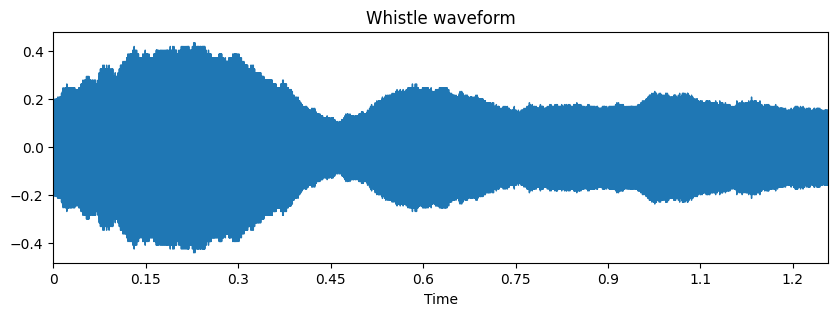

In [12]:
# load the whistle sound, listen to it and plot the waveform
whistle,dsr = librosa.load('siffle.wav', sr=dsr)
fig, ax = plt.subplots(figsize=(10, 3))
librosa.display.waveshow(whistle,sr=dsr)
ax.set(title='Whistle waveform')
ax.set_xlim([0, len(whistle)/dsr])
IPython.display.Audio(data=whistle, rate=dsr)

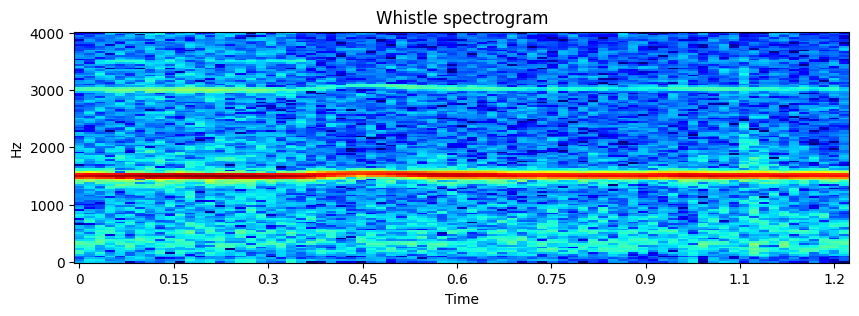

In [13]:
# plot the spectrogram
fig, ax = plt.subplots(figsize=(10, 3))
S_whistle = np.abs(librosa.stft(
    whistle, n_fft=dn_fft, hop_length=dhop_length,center=False))
librosa.display.specshow(librosa.amplitude_to_db(S_whistle, ref=np.max), 
                         n_fft=dn_fft, hop_length=dhop_length, sr=dsr, 
                         x_axis='time', y_axis='linear', ax=ax, cmap='jet')
ax.set(title='Whistle spectrogram');

**What is the approximate frequency of the whistle?  To what corresponds the second visible component? While it is a little difficult to see, describe the correspondance between the amplitude in the waveform and the colour variation in the spectrogram.**

* The frequency of the wistle is approximately 1.5kHz, which is where you see the red almost-straight line. 
* The second visible component is called the *harmonic*, which are integer multiples of the fundamental frequency of the signal.
* The color variation describes the amplitude of the signal. Cold colors, like blue, represent low amplitudes. Warm colors, like red, represent high amplitudes. The fundamental frequency component has the highest amplitude, which is where you can see the red line.

## A speech utterance

Finally, we'll look at a real speech signal.  It's a recording of the French word '*assassiner*'. Like before, we'll plot the waveform and the spectrogram.

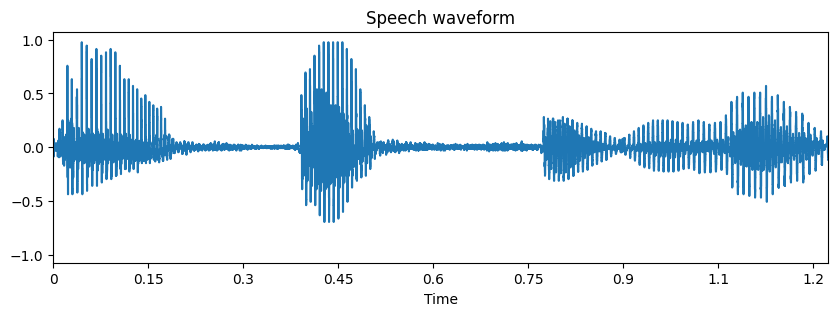

In [14]:
# load the speech signal and plot the waveform
assassine,dsr = librosa.load('assassine.wav', sr=dsr)
fig, ax = plt.subplots(figsize=(10, 3))
librosa.display.waveshow(assassine,sr=dsr)
ax.set(title='Speech waveform')
ax.set_xlim([0, len(assassine)/dsr])
IPython.display.Audio(data=assassine, rate=dsr)

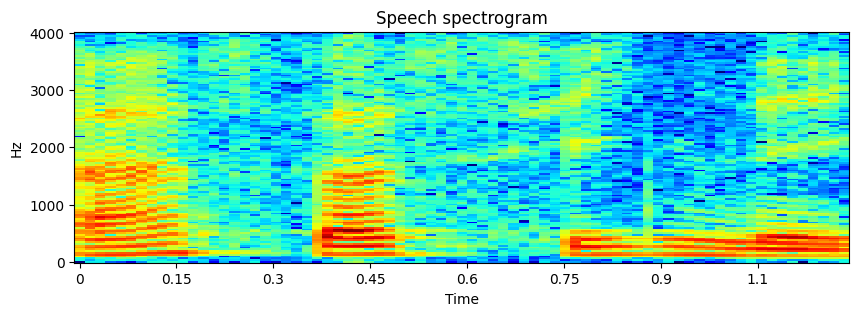

In [15]:
# plot the spectrogram
fig, ax = plt.subplots(figsize=(10, 3))
S_assassine = np.abs(librosa.stft(
    assassine, n_fft=dn_fft, hop_length=dhop_length, center=False))
librosa.display.specshow(
    librosa.amplitude_to_db(S_assassine, ref=np.max), n_fft=dn_fft, 
    hop_length=dhop_length, sr=dsr, x_axis='time', y_axis='linear',
    ax=ax, cmap='jet')
ax.set(title='Speech spectrogram');

**Describe the spectrogram and the correspondance to the waveform. Identity the intervals of voiced and unvoiced speech. What are the red, horizontal striations? Estimate the fundamental frequency for the vowel sounds.**

* Voiced speech (vowels) have higher energy than unvoiced, which we can see from the waveform (A, I, E). This also corresponds to the red areas in the spectogram. Unvoices speech, usally the consonants, have lower energy and therefore corresponds to the blue areas on the spectrogram.
* The red horisontal striations are the formats of the spectrum.
* For A we count until red horisontal striation no. 10, find the frequency and divide by 10. $A=\frac{1500}{10}=150$ Hz. For I we do the same, but with 3. $I=\frac{500}{3}=167$ Hz.

## Narrowband and wideband speech spectrograms

We will produce two different spectrograms for the same example we saw in your lectures, the <tt>9-1-9-6-9-5-1</tt> number sequence pronounced by a female, American speaker. 

In [16]:
numSeq, sr = librosa.load('FAK_9196951A.wav', sr=dsr)
IPython.display.Audio(data=numSeq, rate=dsr)

First, we'll plot a narrowband spectrogram, then a wideband spectrogram. Note that each is produced with a different DFT size <tt>n_fft</tt> and different hop length <tt>hop_length</tt>.

/var/folders/83/0bs_nssj38dc10fftj5s06hh0000gn/T/ipykernel_93799/3989151892.py:2: FutureWarning: waveshow() keyword argument 'x_axis' has been renamed to 'axis' in version 0.10.0.
	This alias will be removed in version 1.0.
  librosa.display.waveshow(numSeq, sr=dsr, ax=ax[0], x_axis=None)


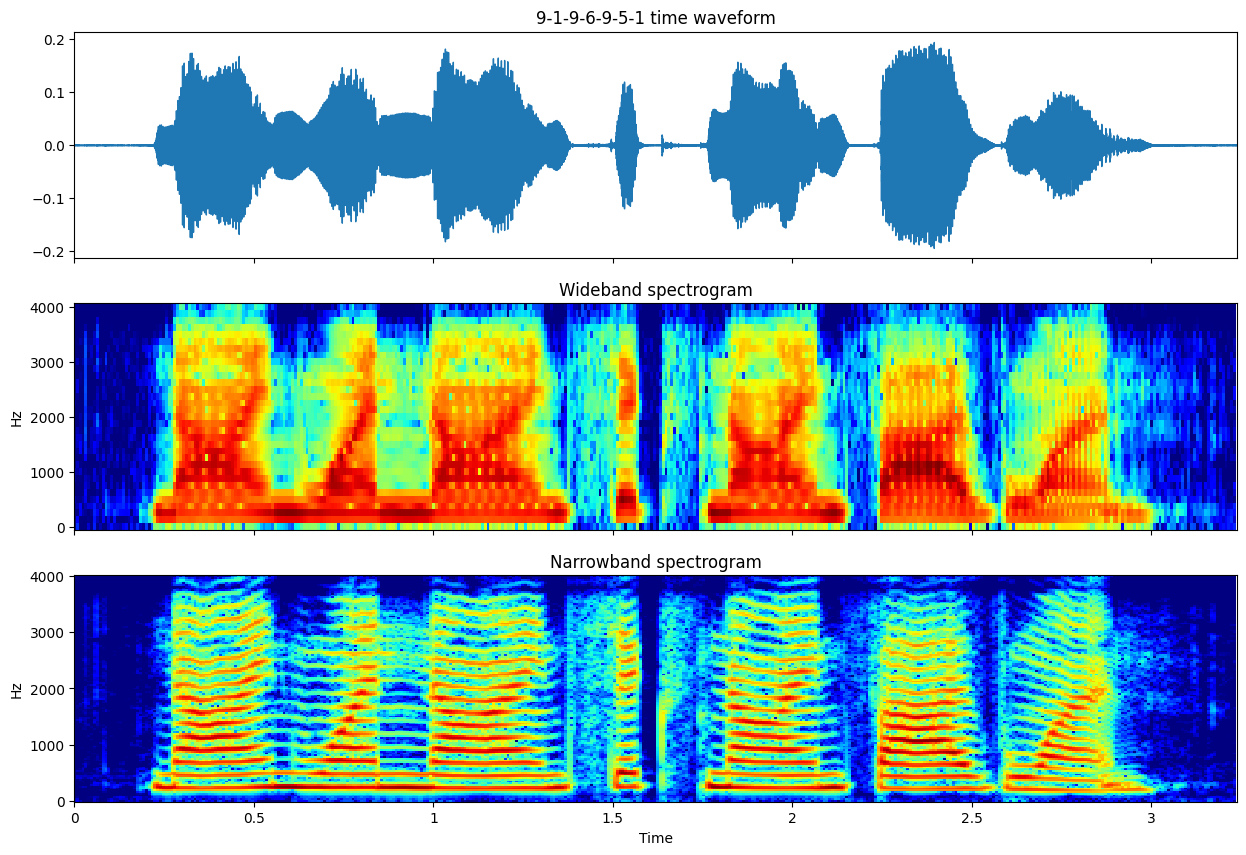

In [17]:
fig, ax = plt.subplots(nrows=3, sharex=True, figsize=(15, 10))
librosa.display.waveshow(numSeq, sr=dsr, ax=ax[0], x_axis=None)
ax[0].set_xlim([0, len(numSeq)/dsr])
ax[0].set(title='9-1-9-6-9-5-1 time waveform');

n_fft=64
hop_length=64
S_numSeq = np.abs(librosa.stft(numSeq, n_fft=n_fft, 
                               hop_length=hop_length))
librosa.display.specshow(
    librosa.amplitude_to_db(S_numSeq, ref=np.max), n_fft=n_fft,
    hop_length=hop_length, sr=dsr, x_axis='time', 
    y_axis='linear', ax=ax[1], cmap='jet')
ax[1].set(title='Wideband spectrogram', xlabel=None);

n_fft=256
hop_length=64
S_numSeq = np.abs(librosa.stft(numSeq, n_fft=n_fft, 
                               hop_length=hop_length))
librosa.display.specshow(
    librosa.amplitude_to_db(S_numSeq, ref=np.max), n_fft=n_fft, 
    hop_length=hop_length, sr=dsr, x_axis='time', 
    y_axis='linear', ax=ax[2], cmap='jet')
ax[2].set(title='Narrowband spectrogram');

**Going beyond the differences in terms of <tt>n_fft</tt> and <tt>hop_length</tt>, compare and contrast the two spectrograms.**

Narrowband spectogram has high spectral resolution, and the wideband has high temporal resolution. We cannot have both high spectral and temporal at the same time. For the narrowband we have a high density of overlap and large windows, while the wideband has less overlap and small windows. In addition, the narrowband has many coefficients and wideband has few.

## Speech bandwidth and quality

Now we'll use spectrogrms to hep study the relationship between bandwidth and perceived speech quality.  We're going to listen to a high bandwidth utterance, look at the relative energy in the high band, and then listen to progressively downsampled versions of the same utterance.  We'll start with an utterance sampled at 22 kHz.

In [18]:
# recording extracted from the Voice Cloning Toolkit (VCTK) Database
# https://datashare.ed.ac.uk/handle/10283/3443
# used under the following licenses
# https://datashare.ed.ac.uk/bitstream/handle/10283/3443/license_text
y_fb, sr = librosa.load('p313_023.wav')
IPython.display.Audio(data=y_fb, rate=sr)

Plot the time waveform and the spectrogam.

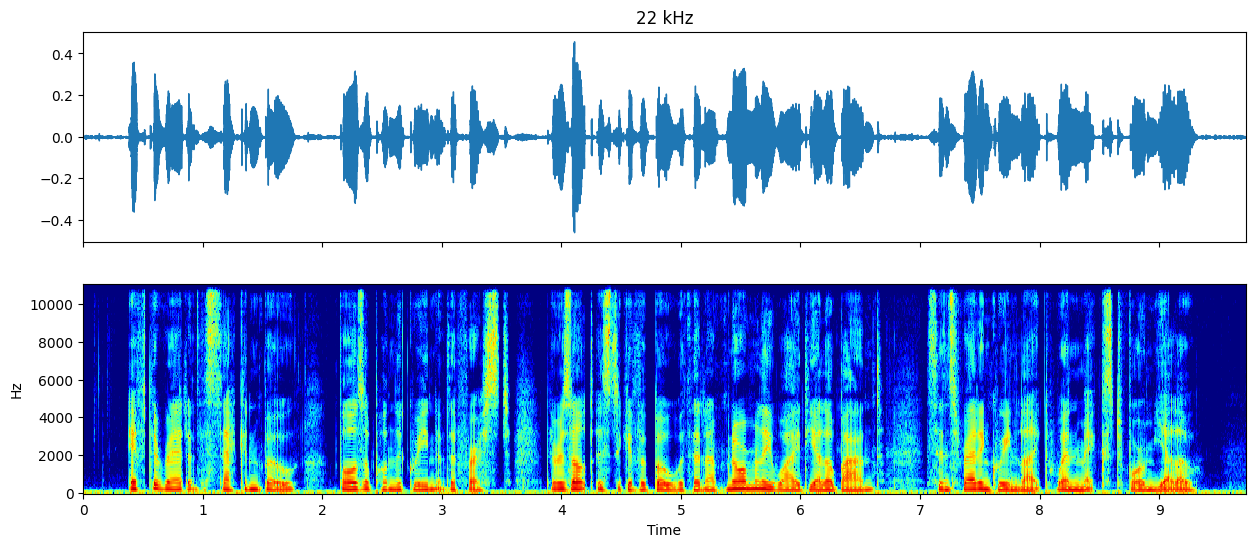

In [19]:
fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(15, 6))
librosa.display.waveshow(y_fb, sr=sr, ax=ax[0])
ax[0].set_xlim([0, len(y_fb)/sr])
ax[0].set(title='22 kHz', xlabel=None);

S_hf = np.abs(librosa.stft(y_fb, n_fft=dn_fft, hop_length=dhop_length))
librosa.display.specshow(librosa.amplitude_to_db(S_hf, ref=np.max), 
                         n_fft=dn_fft, hop_length=dhop_length,
                         sr=sr, x_axis='time', y_axis='linear', 
                         ax=ax[1], cmap='jet');

Notice that there are components across the full spectrum.  We will now repeat the above with the same utterance downsampled to an 8 kHz sampling rate.

In [20]:
target_sr=8000
y_nb = librosa.resample(y_fb, orig_sr=sr, target_sr=target_sr)
IPython.display.Audio(data=y_nb, rate=target_sr)

**Describe the differences in terms of perceived quality.**

The first audio sounds more clear, while the second audio sounds more muffled. Both are easy to understand.

Plot the time waveform and the spectrogam. 

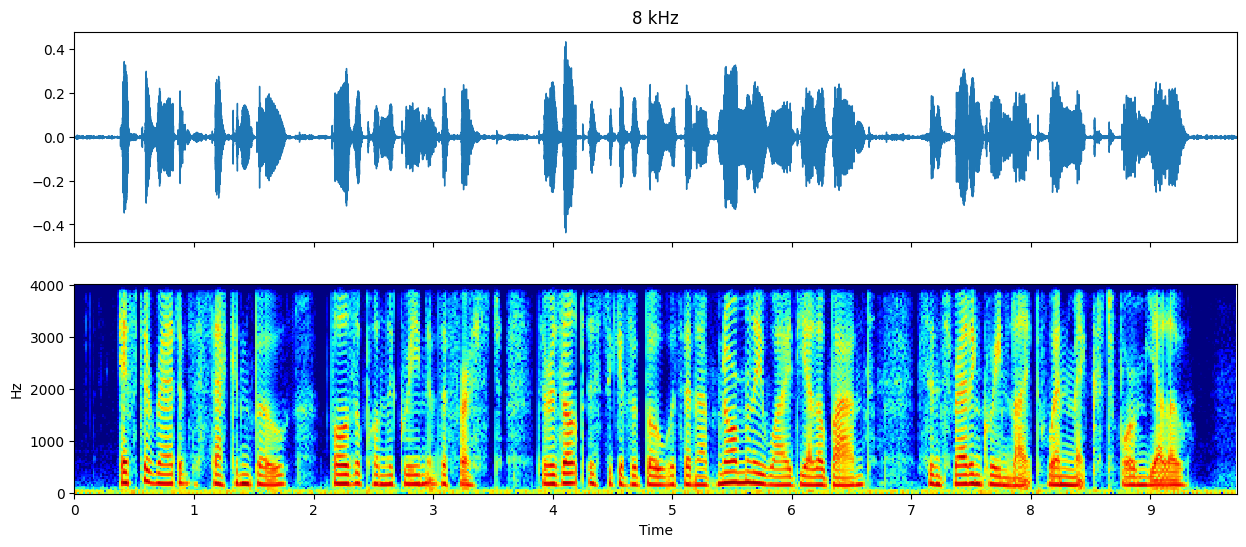

In [21]:
fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(15, 6))
librosa.display.waveshow(y_nb, sr=target_sr, ax=ax[0])
ax[0].set_xlim([0, len(y_nb)/target_sr])
ax[0].set(title='8 kHz', xlabel=None);

S_nb = np.abs(librosa.stft(y_nb, n_fft=dn_fft, hop_length=dhop_length))
librosa.display.specshow(librosa.amplitude_to_db(S_nb, ref=np.max), 
                         n_fft=dn_fft, hop_length=dhop_length,
                         sr=target_sr, x_axis='time', y_axis='linear',
                         ax=ax[1], cmap='jet');

Finally, we'll downsample to a sampling rate of 4 kHz and repeat.

In [22]:
target_sr=4000
y_nb = librosa.resample(y_fb, orig_sr=sr, target_sr=target_sr)
IPython.display.Audio(data=y_nb, rate=target_sr)

Plot the time waveform and the spectrogam.

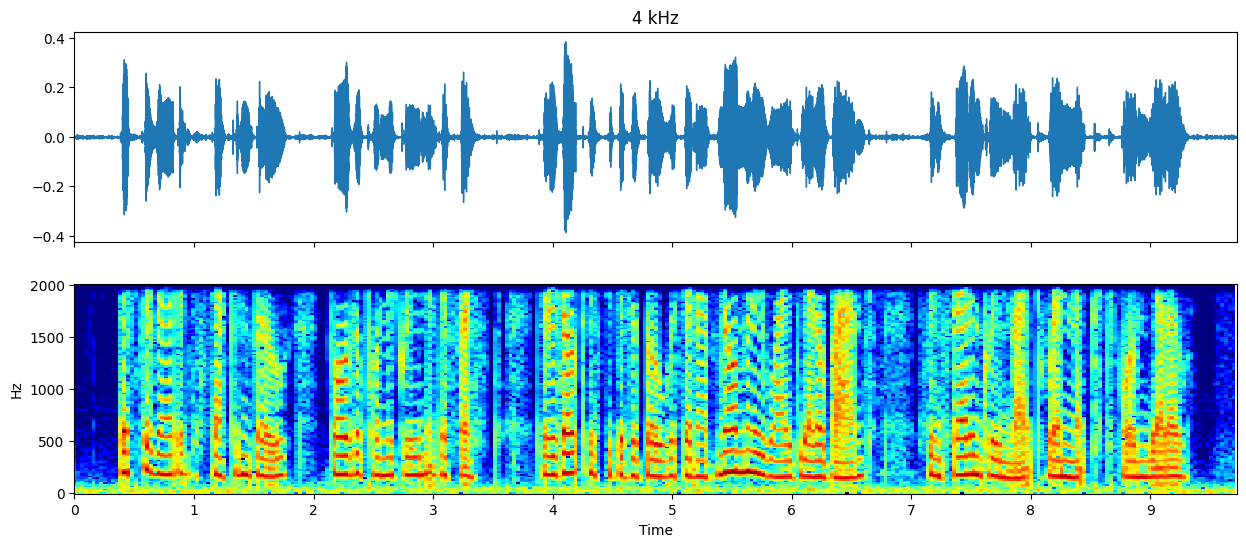

In [23]:
fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(15, 6))
librosa.display.waveshow(y_nb, sr=target_sr, ax=ax[0])
ax[0].set_xlim([0, len(y_nb)/target_sr])
ax[0].set(title='4 kHz', xlabel=None);

S_nb = np.abs(librosa.stft(y_nb, n_fft=dn_fft, hop_length=dhop_length))
librosa.display.specshow(librosa.amplitude_to_db(S_nb, ref=np.max), 
                         n_fft=dn_fft, hop_length=dhop_length,
                         sr=target_sr, x_axis='time', y_axis='linear',
                         ax=ax[1], cmap='jet');

**Notice the substantial degradation in quality.  Describe your observations and explain why the degradation is so much more significant at 4 kHz than at 8 kHz.**

We observe that the range of frequency axis is significanly smaller when we downsample. With this can see the striations easier. For frequencies over 1/2 of the sampling rate, those frequencies are cut off. This is due to the Nyquist rule, which says that the signal must be sampled at more than twice the higher frequency component of the signal.

# Voiced/unvoiced speech and the fundamental frequency

We will now look at the spectral attributes of voiced and unvoiced speech by looking at the spectra of specific intervals of speech.  Each spectrum is extracted from a single frame and is one column of the spectrogram. We'll revert to the same, short recording used earlier, namely that of the French word 'assassiner', the spectrogram of which we will plot again for convenience.

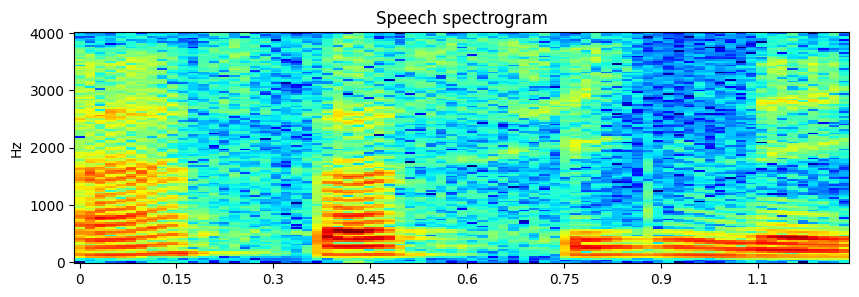

In [24]:
# plot the spectrogram
fig, ax = plt.subplots(figsize=(10, 3))
S_assassine = np.abs(
    librosa.stft(assassine, center=False, n_fft=dn_fft,
                 hop_length=dhop_length))
S_assassine_db = librosa.amplitude_to_db(S_assassine, ref=np.max)   
# center=False, otherwise the 
# number of frames is not equal
# to the number of times produced 
# by librosa.util.frame

librosa.display.specshow(S_assassine_db, 
                         n_fft=dn_fft, hop_length=dhop_length,
                         sr=dsr, x_axis='time', y_axis='linear', 
                         ax=ax, cmap='jet')
ax.set(title='Speech spectrogram', xlabel=None);

Let's select a frame of speech in the vicinity of some particular time instant. You can choose a different time instant according to whether you want to inspect an interval of voiced or unvoiced speech. There is no  error checking, so be sure to choose an instant between 0 and 1.2 seconds. To start with, we'll chose a instant at random, but you should set it yourself according to whether you want to look at voiced or unvoiced speech.

In [25]:
t = random.uniform(0, 1)*len(assassine)/dsr 
# uncomment and change the following to whatever time instant 
# for which you want to plot the spectrum
# t = 0.45 
print('Plotting spectrum at approximately', "{:.2f}".format(t), 'seconds')

Plotting spectrum at approximately 0.45 seconds


Convert this to a frame index.  <tt>len(assassine)</tt> is the number of time samples. <tt>dsr</tt> is the sampling rate. <tt>S_assassine.shape[1]</tt> is the number of frames.

In [26]:
frame_idx=int(t/(len(assassine)/dsr)*S_assassine.shape[1])

Now plot the spectrum for this frame.

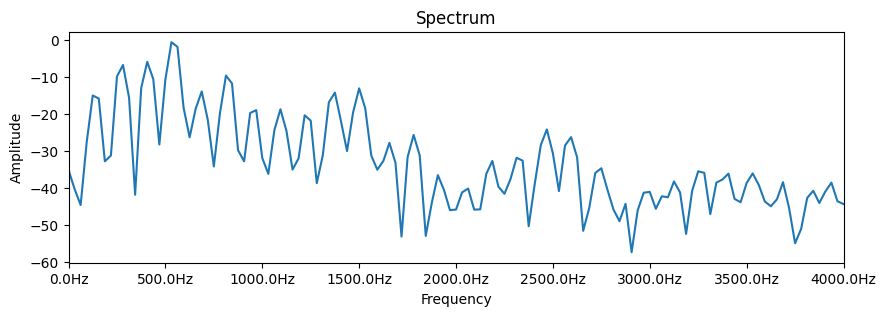

In [27]:
fig, ax = plt.subplots(figsize=(10, 3))
ax.plot(S_assassine_db[:,frame_idx:frame_idx+1])
ax.set(title='Spectrum')
x_tick_pos=[n for n in range(0, dn_fft // 2 + 1, dn_fft // 16)]
x_tick_lbl=[str(dsr / dn_fft * n) + 'Hz' for n in x_tick_pos]
ax.set_xticks(x_tick_pos)
ax.set_xticklabels(x_tick_lbl)
ax.set_xlim([0, dn_fft/2])
ax.set(xlabel='Frequency')
ax.set(ylabel='Amplitude');

Answer the following questions by plotting the spectrum for different frames:
- **What characteristics differentiate voiced and un-voiced sounds in the frequency domain?** For unvoiced sounds, the amplitude will be significantly lower than for voiced speech. There is no periodicity (for non-voiced) and no formants visible, because there is little to no opening and closing of the vocal folds. In our case,  we can se harmonizity and a quite high amplitude, and this is therefor voiced. The spectrum is periodic because of the excitation, which is the opening/closing of the vocal folds (which is the glottal cycle).
- **What is the approximate funamental frequency *F*<sub>0</sub> for the first ‘a’ of ‘assassiner’?** This is something we found earlier, 150Hz.
- **What are the approximate frequencies of the three first formants of the second ‘a’ of ‘assassiner’?** Changing t and get: $F_1\approx 500$ Hz. $F_2\approx 1500$ Hz. $F_3\approx 2500$ Hz. 

# Linear prediction and linear predictive coding

We will see an example of linear predictive encoding and decoding, also referred to as analysis and synthesis, with different prediction orders. We are interested in seeing what is the *error*, or the *excitation* and will compare this for different prediction orders in terms of the mean square error.  

We will start by estimating the filter parameters <tt>a</tt>, the gain <tt>g</tt> and the error <tt>e</tt> for a 10th order filter.

In [28]:
# you can change the prediction order to observe the effect
prediction_order = 10
y=assassine
[a, g, e] = lpc.lpcfit(y, prediction_order)
# and now resynthesize an estimate y_hat of the 
# original signal using the same a, g, and e
y_hat = lpc.lpcsynth(a, g, e)

**Listen to the result.  If all worked well, it should be of the same or similar quality as the original signal.**

By listening to *e* instead you can hear a clear difference when you change the prediction order. You can hear more clear for lower orders (ex. 2). For order 10 you hear a lot of noise and it is very unintelligible. This is what wi want as we want to have more of the actual word in *a*, and all of the noise in *e*. Therefore a prediction order of 10 is better.

In [29]:
IPython.display.Audio(data=y_hat, rate=dsr)

Now we'll plot the original signal, the LPC approximation and the error.

Mean error is 0.01626


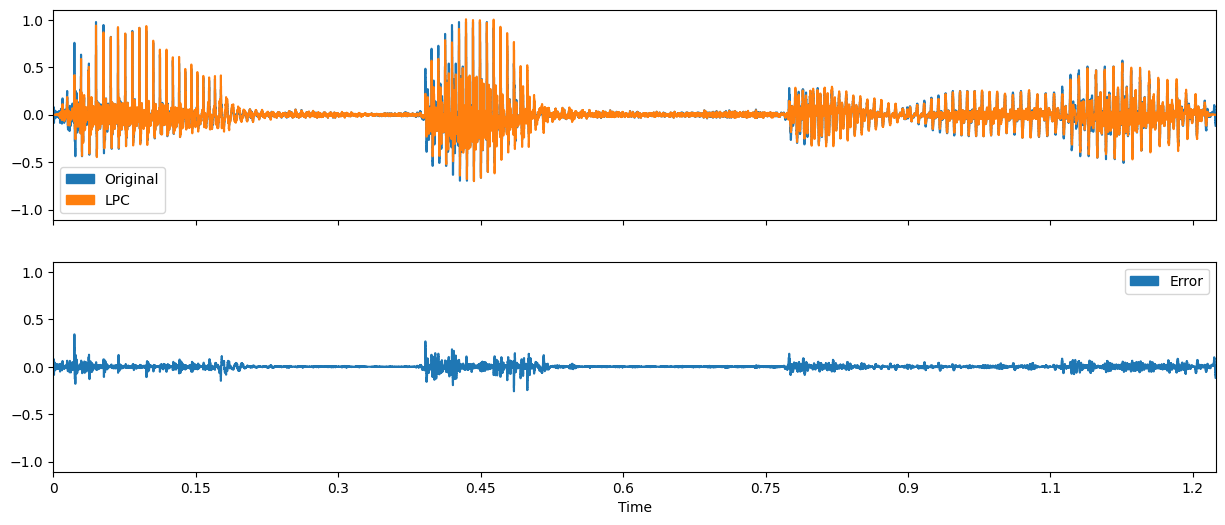

In [30]:
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=(15, 6))
# due to framing, the lengths are unlikely to the same
# find the length of the shortest file
l=min(y.size,y_hat.size)
librosa.display.waveshow(y[:l], sr=dsr, ax=ax[0], label='Original')
librosa.display.waveshow(y_hat[:l], sr=dsr, ax=ax[0], label='LPC')
librosa.display.waveshow(y[:l]-y_hat[:l], sr=dsr, ax=ax[1], label='Error')
ax[0].set_xlim([0, y.size/dsr]);
ax[0].set(xlabel=None);
ax[0].legend()
ax[1].legend()
# compute the mean square error
print('Mean error is', "{:.5f}".format(np.mean(np.square(y[:1]-y_hat[:l]))))
# we don't use e directly since this is normalised individually for each frame

Now we're going to look at an invidual frame in the same way we did earlier in comparing voiced and unvoiced speech.  Once again, we'll initially choose a frame at random, but you should change the parameter to select a specific interval you want to analyse.

In [31]:
t = random.uniform(0, 1)*len(assassine)/dsr 
# uncomment and change the following to whatever time instant 
# for which you want to plot the spectrum
#t = 0.07
print('Plotting spectrum at approximately', "{:.2f}".format(t), 'seconds')

Plotting spectrum at approximately 0.13 seconds


Now we'll extract the frame at this time instant and then plot and compare DFT-derived and LPC-derived spectra.

Mean error is 0.00587


/var/folders/83/0bs_nssj38dc10fftj5s06hh0000gn/T/ipykernel_93799/2462136752.py:23: FutureWarning: waveshow() keyword argument 'x_axis' has been renamed to 'axis' in version 0.10.0.
	This alias will be removed in version 1.0.
  librosa.display.waveshow(frame_data, sr=dsr, ax=ax[0],
/var/folders/83/0bs_nssj38dc10fftj5s06hh0000gn/T/ipykernel_93799/2462136752.py:25: FutureWarning: waveshow() keyword argument 'x_axis' has been renamed to 'axis' in version 0.10.0.
	This alias will be removed in version 1.0.
  librosa.display.waveshow(frame_data_hat, sr=dsr, ax=ax[0],


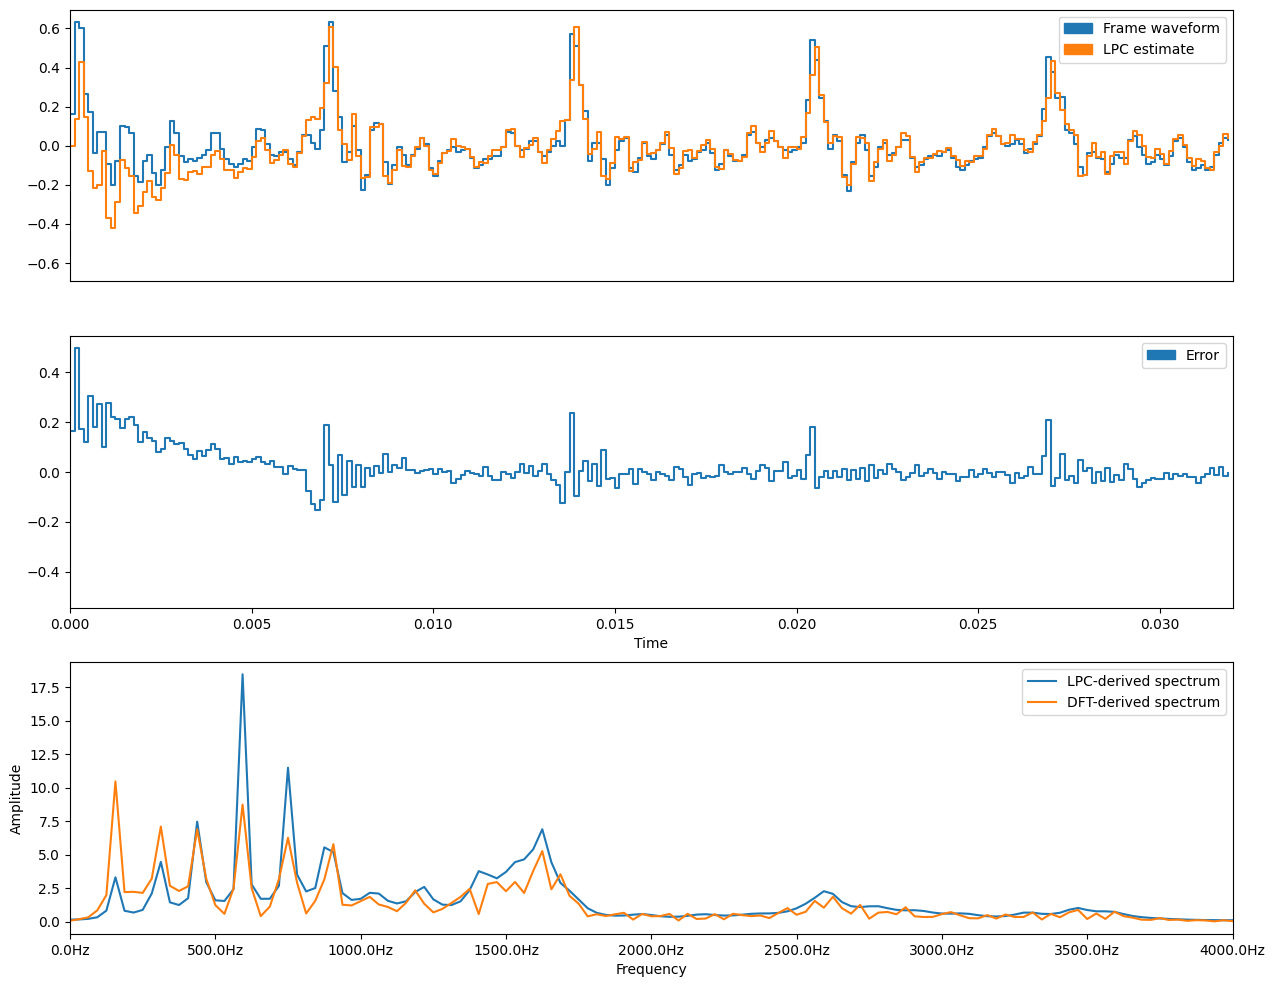

In [32]:
frames=librosa.util.frame(y, frame_length=dn_fft, hop_length=dhop_length)
frame_idx=int(t/(len(y)/dsr)*frames.shape[1])
frame_data=frames[:,frame_idx]

# compute the dft-derived magnitude spectrum
dft_spectrum=np.abs(scipy.fft.fft(frame_data, n=dn_fft))

# compute the lpc-derived magnitude spectrum
prediction_order=50   # don't set too high (<50), otherwise the order
                      # will be greater than the number of samples in 
                      # a single pitch interval (at 8 kHz samp. rate)
a = librosa.lpc(frame_data, order=prediction_order)  
h = np.abs(1/scipy.fft.fft(a, n=dn_fft))

# compute the lpc approximation
b = np.hstack([[0], -1 * a[1:]])
frame_data_hat = scipy.signal.lfilter(b, [1], frame_data)
print('Mean error is', "{:.5f}".format(
    np.mean(np.square(frame_data-frame_data_hat))))

# plot the frame waveform and lpc-derived approximation
fig, ax = plt.subplots(nrows=3, figsize=(15, 12))
librosa.display.waveshow(frame_data, sr=dsr, ax=ax[0], 
                         x_axis=None, label='Frame waveform')
librosa.display.waveshow(frame_data_hat, sr=dsr, ax=ax[0], 
                         x_axis=None, label='LPC estimate')
librosa.display.waveshow(frame_data-frame_data_hat, sr=dsr, 
                         ax=ax[1], label='Error')
ax[0].legend(); ax[1].legend()
ax[0].set(xlabel=None);
ax[0].set_xlim([0, frame_data.size/dsr])
ax[1].set_xlim([0, frame_data.size/dsr])

# plot the two spectra, resampling the dft_spectrum to the same size
ax[2].plot(abs(h),label='LPC-derived spectrum')
ax[2].plot(dft_spectrum, label='DFT-derived spectrum')
x_tick_pos=[n for n in range(0, dn_fft //2 +1, dn_fft // 16)]
x_tick_lbl=[str(dsr / dn_fft * n) + 'Hz' for n in x_tick_pos]
ax[2].set_xticks(x_tick_pos)
ax[2].set_xticklabels(x_tick_lbl)
ax[2].set_xlim([0, dn_fft / 2])
ax[2].legend();
ax[2].set(xlabel='Frequency')
ax[2].set(ylabel='Amplitude');

**Plot the DFT-derived and LPC-derived spectra for different frames containing either voiced or unvoiced speech and for different prediction orders and then describe and account for the differences you observe.  What is the relationship between the number of detected formants and the order of the prediction?**

This plot looks like to a voiced speech, as the amplitude is high (almost 50). For lower prediction orders, the LPC-derived spectrum is becoming smoother and with less details. When the prediction order is 10 we can detect 3 formants, and with even lower we see fewer formants. Therefore we can say that the higher the order of prediction is, the highter is the number of formants detected.

## Error analysis

We'll examine the LPC approximation errors for four different signals ‹a›, ‹ch›, ‹whistle› and ‹a – saturated› and for predictions of order 12.  We'll load the four waveforms, cut each to a consistent, short duration of 0.1 seconds and normalise them to have peak, unity amplitude.  Then we'll derive the prediction coefficients and resynthesize LPC approximations.

In [33]:
prediction_order=12
n_fft=1024
duration=0.1

# for the vowel a
y_a, dsr = librosa.load('a.wav', sr=dsr, duration=duration)
y_a = y_a / max(y_a)
a = librosa.lpc(y_a, order=prediction_order) 
b = np.hstack([[0], -1 * a[1:]])
y_a_hat = scipy.signal.lfilter(b, [1], y_a)

# for the consonant ch
y_ch, dsr = librosa.load('ch.wav', sr=dsr, duration=duration)
y_ch = y_ch / max(y_ch)
a = librosa.lpc(y_ch, order=prediction_order) 
b = np.hstack([[0], -1 * a[1:]])
y_ch_hat = scipy.signal.lfilter(b, [1], y_ch)

# for the whistle
y_whistle, dsr = librosa.load('siffle.wav', sr=dsr, duration=duration)
y_whistle = y_whistle / max(y_whistle)
a = librosa.lpc(y_whistle, order=prediction_order) 
b = np.hstack([[0], -1 * a[1:]])
y_whistle_hat = scipy.signal.lfilter(b, [1], y_whistle)

# for the saturated vowel a
y_asat, dsr = librosa.load('asat.wav', sr=dsr, duration=duration)
y_asat = y_asat / max(y_asat)
a = librosa.lpc(y_asat, order=prediction_order) 
b = np.hstack([[0], -1 * a[1:]])
y_asat_hat = scipy.signal.lfilter(b, [1], y_asat)

Now we'll plot the normalised waveforms (blue profiles) and superimpose upon them the error (orange profiles), namely the difference between the original waveforms and the LPC approximations.  We'll also compute the mean square error in each case (shown in the respective legends).

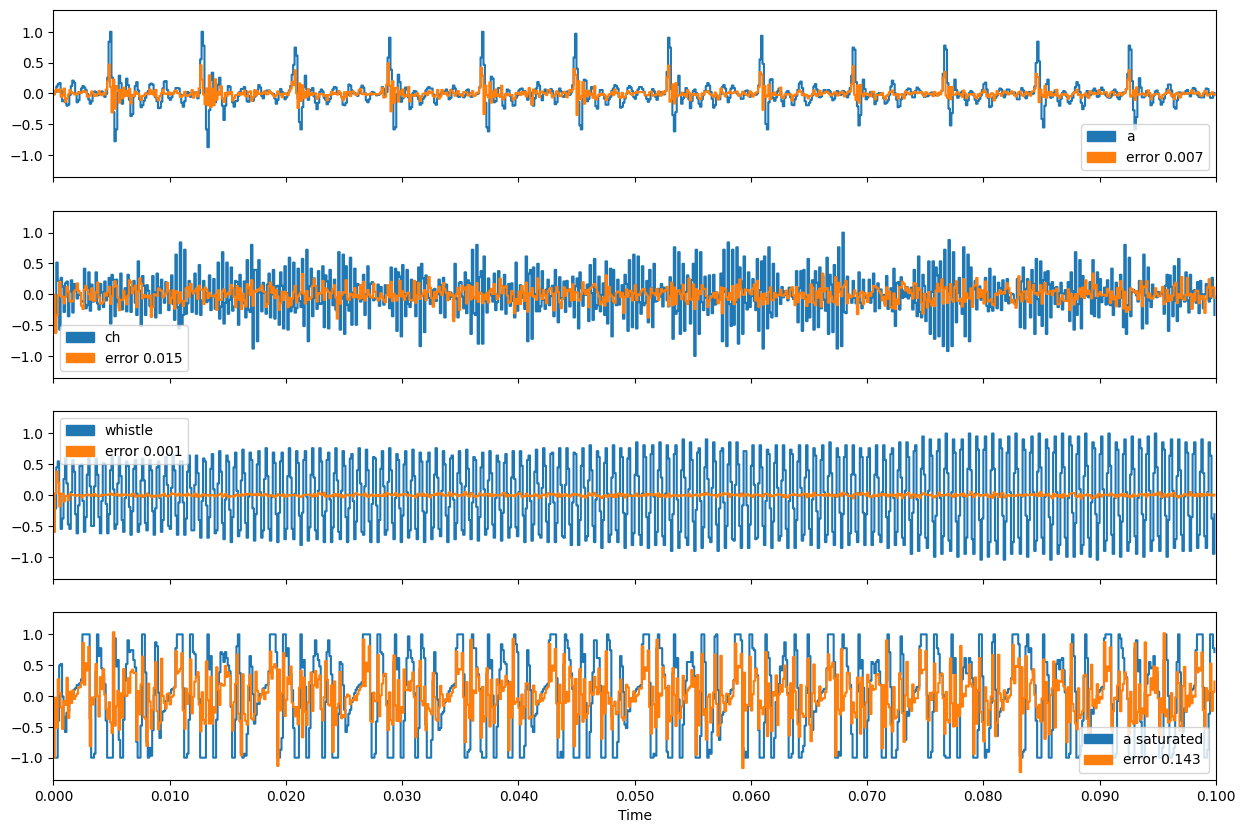

In [34]:
fig, ax = plt.subplots(nrows=4, sharex=True, sharey=True, figsize=(15, 10))

librosa.display.waveshow(y_a, sr=dsr, ax=ax[0], label='a')
z=np.mean(np.square(y_a-y_a_hat))
librosa.display.waveshow(y_a-y_a_hat, sr=dsr, ax=ax[0], 
                         label='error '+"{:.3f}".format((z)))

librosa.display.waveshow(y_ch, sr=dsr, ax=ax[1], label='ch')
z=np.mean(np.square(y_ch-y_ch_hat))
librosa.display.waveshow(y_ch-y_ch_hat, sr=dsr, ax=ax[1], 
                         label='error '+"{:.3f}".format((z)))

librosa.display.waveshow(y_whistle, sr=dsr, ax=ax[2], 
                         label='whistle')
z=np.mean(np.square(y_whistle-y_whistle_hat))
librosa.display.waveshow(y_whistle-y_whistle_hat, sr=dsr, 
                         ax=ax[2], label='error '+"{:.3f}".format((z)))

librosa.display.waveshow(y_asat, sr=dsr, ax=ax[3], 
                         label='a saturated')
z=np.mean(np.square(y_asat-y_asat_hat))
librosa.display.waveshow(y_asat-y_asat_hat, sr=dsr, ax=ax[3], 
                         label='error '+"{:.3f}".format((z)))

ax[0].legend(); ax[1].legend(); ax[2].legend(); ax[3].legend()
ax[0].set(xlabel=None); ax[1].set(xlabel=None); ax[2].set(xlabel=None);
ax[0].set_xlim([0, duration]);

**Comment on and compare the results for each of the four waveforms.**

* "a" (1st plot) is a voiced sound where the error increases when the amplitude increases.
* "ch" (2nd plot) is unvoices speech and therefore has higher error then "a". The error can be seen as noise.
* The whistle (3rd plot) has the lowest error, which is expected since the signal is largely uniform with the same frequency throughout and is therefore easy to predict. 
* "a" saturated (4th plot) had the highest error, as it is more unpredictable compared to the unsaturated "a". The shape of the normalization

## Cross-synthesis
Now we'll generate the cross-synthesis examples that we looked at in your lectures.  The objective is to reinforce your understanding of what are the two components in the source-filter model.  We'll start by loading the same speech utterance used in the lecture examples, namely the utterance '*the football team coach has a watch thin as a dime*' spoken by an American male speaker, a short snippet of piano music and a pulse train.

In [35]:
y_speech, sr_speech = librosa.load('mpgr1_sx419-8k.wav', sr=dsr)
y_bach, sr_bach = librosa.load('bach.8k.wav', sr=dsr)
y_pulseTrain, sr_pulseTrain = librosa.load('pulseTrain.wav', sr=dsr)
y_noise = np.random.normal(0,1,4*dsr)

# cut all waveforms to the same minimum length
min_l = min(y_speech.size, y_bach.size, y_pulseTrain.size, y_noise.size)
y_speech = y_speech[:min_l]
y_bach = y_bach[:min_l]
y_pulseTrain = y_pulseTrain[:min_l]
y_noise = y_noise[:min_l]

Now we'll perform LPC analysis of all three.

In [36]:
[a_speech, g_speech, e_speech] = lpc.lpcfit(y_speech, 20)
[a_bach, g_bach, e_bach] = lpc.lpcfit(y_bach, 20)
[a_pulseTrain, g_pulseTrain, e_pulseTrain] = lpc.lpcfit(y_pulseTrain, 20)
[a_noise, g_noise, e_noise] = lpc.lpcfit(y_noise, 20)

Now we resynthesise an estimate of the original speech as a reference and listen to it.  It should sound like high quality, natural speech.

In [37]:
y_speech_hat = lpc.lpcsynth(a_speech, g_speech, e_speech)
IPython.display.Audio(data=y_speech_hat, rate=dsr)

Now we'll plot the waveforms and spectrograms for the original and resynthesised utterances.

/var/folders/83/0bs_nssj38dc10fftj5s06hh0000gn/T/ipykernel_93799/1357567360.py:4: FutureWarning: waveshow() keyword argument 'x_axis' has been renamed to 'axis' in version 0.10.0.
	This alias will be removed in version 1.0.
  librosa.display.waveshow(y_speech, sr=sr_bach, ax=ax[0,0],


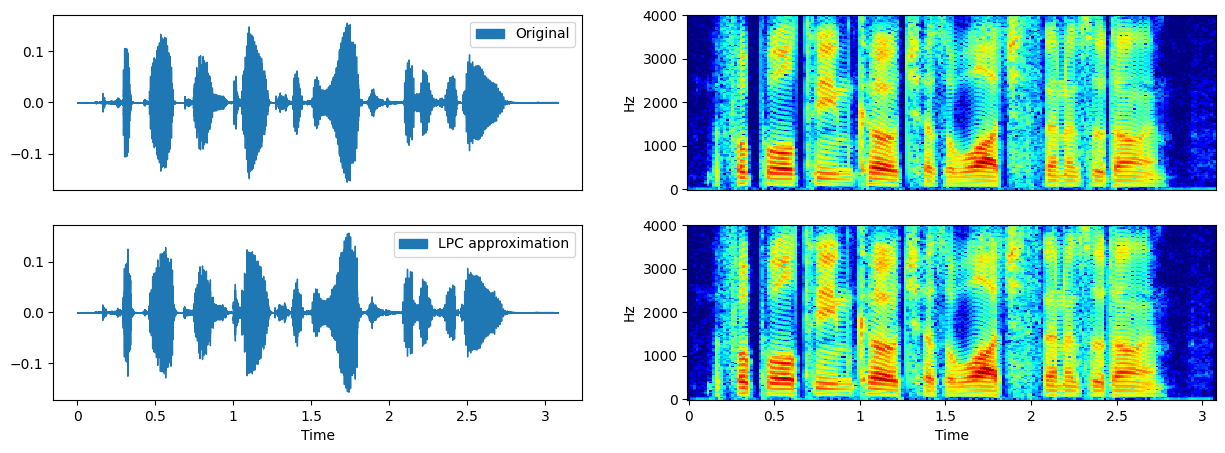

In [38]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 5))

# the original
librosa.display.waveshow(y_speech, sr=sr_bach, ax=ax[0,0], 
                         x_axis=None, label='Original')
ax[0,0].legend()
ax[0,0].set(xlabel=None);
S_speech = np.abs(librosa.stft(y_speech, n_fft=dn_fft, 
                               hop_length=dhop_length))
S_speech_db = librosa.amplitude_to_db(S_speech, ref=np.max)
librosa.display.specshow(S_speech_db, n_fft=dn_fft, 
                         hop_length=dhop_length, sr=sr_bach, x_axis=None, 
                         y_axis='linear', ax=ax[0,1], cmap='jet')
ax[0,1].set(xlabel=None);

# the approximation
librosa.display.waveshow(y_speech_hat, sr=sr_bach, ax=ax[1,0], 
                         label='LPC approximation')
ax[1,0].legend()
S_speech_hat = np.abs(librosa.stft(y_speech_hat, n_fft=dn_fft, 
                                   hop_length=dhop_length))
S_speech_hat_db = librosa.amplitude_to_db(S_speech_hat, ref=np.max)
librosa.display.specshow(S_speech_hat_db, n_fft=dn_fft, 
                         hop_length=dhop_length, sr=sr_bach, 
                         x_axis='time', y_axis='linear', 
                         ax=ax[1,1], cmap='jet');

As expected, we see very little difference between the two.

Now for the cross synthesis. We will resynthesise new waveforms by mixing the LPC coefficients generated from the speech signal with excitation components generated from other signals and listen to the results. Think about the difference between the source and the filter and the influence of both upon what you will hear.  We'll start by using the *excitation* from a short snippet of Bach piano music.

In [39]:
IPython.display.Audio(data=e_bach, rate=dsr)

This won't sound great, at least certainly not as high quality as the original signal.  Now we'll perform the cross-synthesis using the filter information of the speech signal and the excitation of the piano music.  We'll plot waveforms and spectrograms of the piano music excitation and then the cross-synthesis.

/var/folders/83/0bs_nssj38dc10fftj5s06hh0000gn/T/ipykernel_93799/701803218.py:5: FutureWarning: waveshow() keyword argument 'x_axis' has been renamed to 'axis' in version 0.10.0.
	This alias will be removed in version 1.0.
  librosa.display.waveshow(e_bach, sr=sr_bach, ax=ax[0,0],
/var/folders/83/0bs_nssj38dc10fftj5s06hh0000gn/T/ipykernel_93799/701803218.py:7: FutureWarning: waveshow() keyword argument 'x_axis' has been renamed to 'axis' in version 0.10.0.
	This alias will be removed in version 1.0.
  librosa.display.waveshow(y_speech_hat_e_bach, sr=sr_bach,


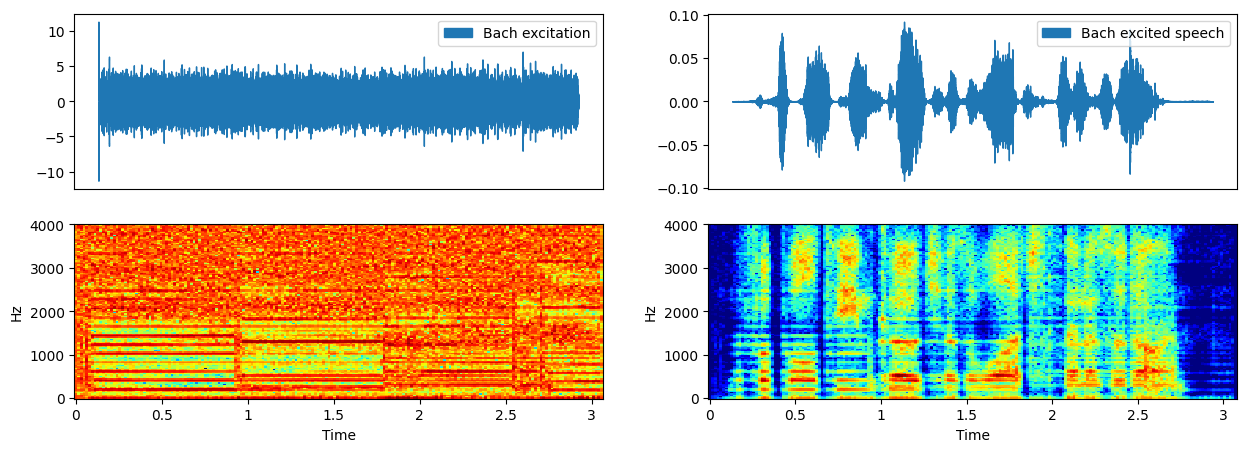

In [40]:
y_speech_hat_e_bach = lpc.lpcsynth(a_speech, g_speech, e_bach)

# plot the time waveforms
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(15, 5))
librosa.display.waveshow(e_bach, sr=sr_bach, ax=ax[0,0], 
                         x_axis=None, label='Bach excitation')
librosa.display.waveshow(y_speech_hat_e_bach, sr=sr_bach, 
                         ax=ax[0,1], x_axis=None, 
                         label='Bach excited speech')
ax[0,0].legend()
ax[0,1].legend()

# and the corresponding spectrogams
S_e_bach = np.abs(librosa.stft(e_bach, n_fft=dn_fft, 
                               hop_length=dhop_length))
S_e_bach_db = librosa.amplitude_to_db(S_e_bach, ref=np.max)
librosa.display.specshow(S_e_bach_db, n_fft=dn_fft, 
                         hop_length=dhop_length, sr=sr_speech, 
                         x_axis='time', y_axis='linear', 
                         ax=ax[1,0], cmap='jet')
S_y_speech_hat_e_bach = np.abs(librosa.stft(
    y_speech_hat_e_bach, n_fft=dn_fft, hop_length=dhop_length))
S_y_speech_hat_e_bach_db = librosa.amplitude_to_db(
    S_y_speech_hat_e_bach, ref=np.max)
librosa.display.specshow(
    S_y_speech_hat_e_bach_db, n_fft=dn_fft, 
    hop_length=dhop_length, sr=sr_speech, x_axis='time', 
    y_axis='linear', ax=ax[1,1], cmap='jet');

Ignore the scale of the excitation plot; it has been normalised at the frame-level.  Now we'll listen to the resynthesis.

In [41]:
IPython.display.Audio(data=y_speech_hat_e_bach, rate=dsr)

Hopefully, you'll now have a more intuitive understanding of what is the source and what is the filter.

To reinforce this understanding, we'll do the same using the excitation signal of the pulse train. Here's the pulse train itself.

In [42]:
IPython.display.Audio(data=y_pulseTrain, rate=dsr)

Any now for the resynthesis.  Again, we'll plot waveforms and spectrograms of the pulse train excitation and then the cross-synthesis.

/var/folders/83/0bs_nssj38dc10fftj5s06hh0000gn/T/ipykernel_93799/2180701375.py:5: FutureWarning: waveshow() keyword argument 'x_axis' has been renamed to 'axis' in version 0.10.0.
	This alias will be removed in version 1.0.
  librosa.display.waveshow(e_pulseTrain, sr=sr_bach, ax=ax[0,0],
/var/folders/83/0bs_nssj38dc10fftj5s06hh0000gn/T/ipykernel_93799/2180701375.py:7: FutureWarning: waveshow() keyword argument 'x_axis' has been renamed to 'axis' in version 0.10.0.
	This alias will be removed in version 1.0.
  librosa.display.waveshow(y_speech_hat_e_pulseTrain, sr=sr_bach,


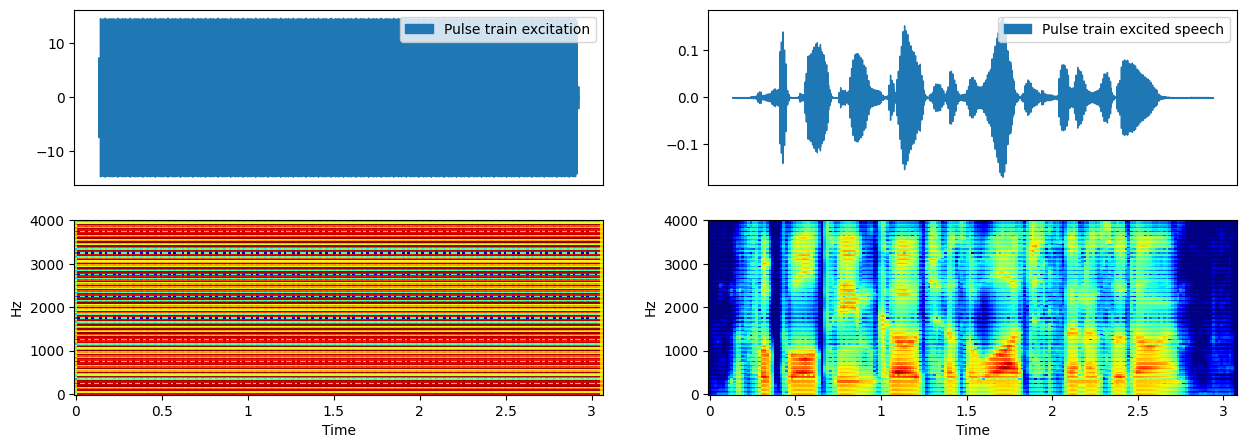

In [43]:
y_speech_hat_e_pulseTrain = lpc.lpcsynth(a_speech, g_speech, e_pulseTrain)

# plot the time waveforms
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(15, 5))
librosa.display.waveshow(e_pulseTrain, sr=sr_bach, ax=ax[0,0], 
                         x_axis=None, label='Pulse train excitation')
librosa.display.waveshow(y_speech_hat_e_pulseTrain, sr=sr_bach,
                         ax=ax[0,1], x_axis=None,
                         label='Pulse train excited speech')
ax[0,0].legend()
ax[0,1].legend()

# and the corresponding spectrogams
S_e_pulseTrain = np.abs(librosa.stft(e_pulseTrain, n_fft=dn_fft,
                                     hop_length=dhop_length))
S_e_pulseTrain_db = librosa.amplitude_to_db(
    S_e_pulseTrain, ref=np.max)
librosa.display.specshow(S_e_pulseTrain_db, n_fft=dn_fft, 
                         hop_length=dhop_length, sr=sr_speech, 
                         x_axis='time', y_axis='linear', 
                         ax=ax[1,0], cmap='jet')
S_y_speech_hat_e_pulseTrain = np.abs(librosa.stft(
    y_speech_hat_e_pulseTrain, n_fft=dn_fft, hop_length=dhop_length))
S_y_speech_hat_e_pulseTrain_db = librosa.amplitude_to_db(
    S_y_speech_hat_e_pulseTrain, ref=np.max)
librosa.display.specshow(S_y_speech_hat_e_pulseTrain_db, n_fft=dn_fft, 
                         hop_length=dhop_length, sr=sr_speech, 
                         x_axis='time', y_axis='linear', ax=ax[1,1], 
                         cmap='jet');

Try to predict how will sound the resynthesis before you listen to it.

In [44]:
IPython.display.Audio(data=y_speech_hat_e_pulseTrain, rate=dsr)

Finally, here's the same style of cross-synthesis using excitation from a white noise signal.  Here it is.

In [45]:
IPython.display.Audio(data=e_noise, rate=dsr)

/var/folders/83/0bs_nssj38dc10fftj5s06hh0000gn/T/ipykernel_93799/3511310123.py:5: FutureWarning: waveshow() keyword argument 'x_axis' has been renamed to 'axis' in version 0.10.0.
	This alias will be removed in version 1.0.
  librosa.display.waveshow(e_noise, sr=sr_speech, ax=ax[0,0],
/var/folders/83/0bs_nssj38dc10fftj5s06hh0000gn/T/ipykernel_93799/3511310123.py:7: FutureWarning: waveshow() keyword argument 'x_axis' has been renamed to 'axis' in version 0.10.0.
	This alias will be removed in version 1.0.
  librosa.display.waveshow(y_speech_hat_e_noise, sr=sr_speech,


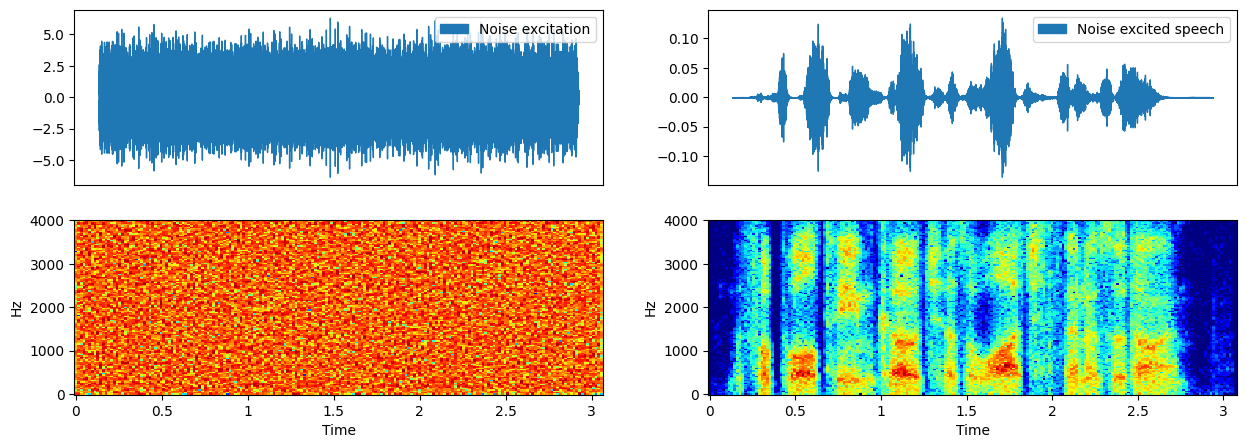

In [46]:
y_speech_hat_e_noise = lpc.lpcsynth(a_speech, g_speech, e_noise)

# plot the time waveforms
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(15, 5))
librosa.display.waveshow(e_noise, sr=sr_speech, ax=ax[0,0], 
                         x_axis=None, label='Noise excitation')
librosa.display.waveshow(y_speech_hat_e_noise, sr=sr_speech, 
                         ax=ax[0,1], x_axis=None, 
                         label='Noise excited speech')
ax[0,0].legend()
ax[0,1].legend()

# and the corresponding spectrogams
S_e_noise = np.abs(librosa.stft(e_noise, n_fft=dn_fft, 
                                hop_length=dhop_length))
S_e_noise_db = librosa.amplitude_to_db(S_e_noise, ref=np.max)
librosa.display.specshow(S_e_noise_db, n_fft=dn_fft, 
                         hop_length=dhop_length, sr=sr_speech, 
                         x_axis='time', y_axis='linear', 
                         ax=ax[1,0], cmap='jet')
S_y_speech_hat_e_noise = np.abs(librosa.stft(
    y_speech_hat_e_noise, n_fft=dn_fft, hop_length=dhop_length))
S_y_speech_hat_e_noise_db = librosa.amplitude_to_db(
    S_y_speech_hat_e_noise, ref=np.max)
librosa.display.specshow(S_y_speech_hat_e_noise_db, 
                         n_fft=dn_fft, hop_length=dhop_length, 
                         sr=sr_speech, x_axis='time', 
                         y_axis='linear', ax=ax[1,1], 
                         cmap='jet');

Here's the cross-synthesis.

In [47]:
IPython.display.Audio(data=y_speech_hat_e_noise, rate=dsr)

**Briefly describe what you heard in the examples above and then describe in your own words what are the source and the filter in the source-filter model and their physiological origins.**

* In the first example, where we have a cross synthesis between the voice sample and Bach piano music, was where we could hear the voice the best. 
* In the second example, where we have a cross synthesis between the voice sample and a pulse train, we can hear the voice sounding more like a robot. Still, you can hear the words.
* In the third example, where we have a cross synthesis between the voice sample and white noise, we hear the voice with more noise and is harder to hear. 

## LPC spectrograms

Since we can estimate spectra using LPC, we can produce spectrograms too.  We'll now do this for the short *assassiner* utterance from earlier. We'll start by deriving the prediction coefficients and will then plot and compare LPC-derived and DFT-derived spectrograms.

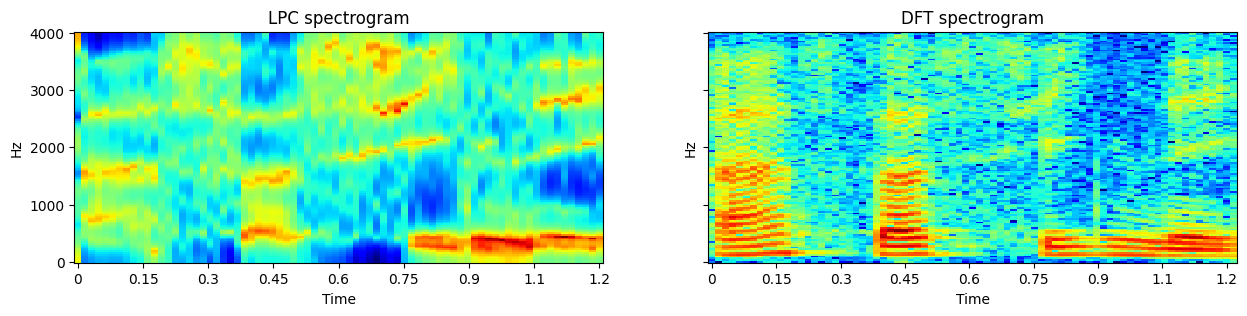

In [48]:
[a, g, e] = lpc.lpcfit(assassine, 20, h=dhop_length, w=dn_fft)

fig, ax = plt.subplots(ncols=2, sharey=True,figsize=(15, 3))

# compute and plot the LPC spectrogram
S=np.abs(scipy.fft.fft(a[0,:], n=dn_fft))
for i in range(1,a.shape[0]):
    S = np.vstack((S,np.abs(1/scipy.fft.fft(a[i,:], n=dn_fft))))
S_db = librosa.amplitude_to_db(S[:,0:(dn_fft//2+1)].T, ref=np.max)
librosa.display.specshow(S_db, n_fft=dn_fft, hop_length=dhop_length, 
                         sr=sr_speech, x_axis='time', 
                         y_axis='linear', ax=ax[0], cmap='jet')
ax[0].set(title='LPC spectrogram')

# compute and plot the DFT spectrogram
S_assassine = np.abs(librosa.stft(y, center=True, n_fft=dn_fft, 
                                  hop_length=dhop_length))
S_assassine_db = librosa.amplitude_to_db(
    S_assassine, ref=np.max)                                                                  
librosa.display.specshow(
    S_assassine_db, n_fft=dn_fft, hop_length=dhop_length, 
    sr=dsr, x_axis='time', y_axis='linear', ax=ax[1], cmap='jet')
ax[1].set(title='DFT spectrogram');

**Explain the principal differences you observe between the two spectrograms and describe their origins as regards both the human speech production process and the tools used for signal analyis.**

The LPC prediction supresses the harmonics in the signal, which is why we do not see as many red lines in the plot. The spectrogram looks smoother, while still preserving information about the formants (as long as the number of coefficients is sufficient). The DFT signal might make speech recognition more complex, since there is a lot of information to take into account (model). But we can clearly still see the result of the vocal folds vibrating (harmonics) when a human creates a voiced sound. Although this information might not be the most important to a speech analysis tool.

## Modelling

We will now look at how representations of speech, such as those derived using LPC analysis, can be of use in modelling and classifying/recognising speech signals.  We will look at estimating the formant positions of three different vowel sounds, specifically the three vowels we looked at in lectures, the /aa/, /er/ and /iy/ vowels.  We'll plot them and listen to them first.

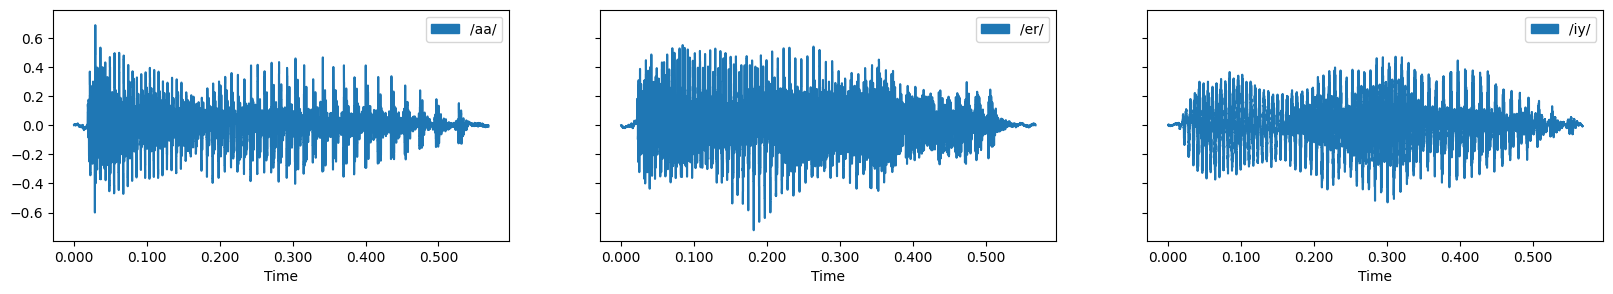

In [49]:
# vowel sounds sourced from
# https://en.wikipedia.org/wiki/Help:IPA
# and converted to wav format
# used under the following licenses
# https://en.wikipedia.org/wiki/File:Open_back_unrounded_vowel.ogg
# https://en.wikipedia.org/wiki/File:Open-mid_central_unrounded_vowel.ogg
# https://en.wikipedia.org/wiki/File:Close_front_unrounded_vowel.ogg
y_aa, dsr = librosa.load('Open_back_unrounded_vowel.wav', sr=dsr)
y_er, dsr = librosa.load('Open-mid_central_unrounded_vowel.wav', sr=dsr)
y_iy, dsr = librosa.load('Close_front_unrounded_vowel.wav', sr=dsr)

# make them the same, shortest length
l=min(y_aa.size,y_er.size,y_iy.size)
y_aa=y_aa[:l]
y_er=y_er[:l]
y_iy=y_iy[:l]

# plot the files
fig, ax = plt.subplots(ncols=3, sharey=True, figsize=(20, 3))
librosa.display.waveshow(y_aa, sr=dsr, ax=ax[0], label='/aa/')
librosa.display.waveshow(y_er, sr=dsr, ax=ax[1], label='/er/')
librosa.display.waveshow(y_iy, sr=dsr, ax=ax[2], label='/iy/')
ax[0].legend(); ax[1].legend(); ax[2].legend();

Listen to the /aa/ sound.

In [50]:
IPython.display.Audio(data=y_aa, rate=dsr) 

Listen to the /er/ sound.

In [51]:
IPython.display.Audio(data=y_er, rate=dsr) 

Listen to the /iy/ sound.

In [52]:
IPython.display.Audio(data=y_iy, rate=dsr) 

Now we'll extract frame-level LPC coefficients from each of the three audio files and *estimate* the frequencies of the first two formants.

In [53]:
# default enframing and lpc parameters
hop_length=16
lpc_order=8
n_formants=int((lpc_order+2)/2)

# estimate the filter parameters a for each sound
[a_aa, g_aa, e_aa] = lpc.lpcfit(y_aa, lpc_order, h=hop_length, w=dn_fft)
[a_er, g_er, e_er] = lpc.lpcfit(y_er, lpc_order, h=hop_length, w=dn_fft)
[a_iy, g_iy, e_iy] = lpc.lpcfit(y_iy, lpc_order, h=hop_length, w=dn_fft)

# and now estimate the formant frequencies
# for /aa/
frqs_aa = np.empty((0,n_formants), float)
for i in range(a_aa.shape[0]):
    # compute the complex roots of the polynomial
    r_aa=np.roots(a_aa[i,:])
    # select those in the top half of the z-pland
    rts_aa = [r for r in r_aa if np.imag(r) >= 0]
    # ensure the correct number of array elements
    rts_aa = np.pad(rts_aa, (0,n_formants-len(rts_aa)))
    # determine the angles
    angz_aa = np.arctan2(np.imag(rts_aa), np.real(rts_aa))
    # the frequencies in Hz
    frq = np.array([sorted(angz_aa * (sr / (2 * np.pi)))])
    # remove any below 100 Hz
    frq = np.roll(frq, -sum(frq < 100))
    # append to the matrix
    frqs_aa=np.append(frqs_aa, frq, axis=0)
# for /er/
frqs_er = np.empty((0,n_formants), float)
for i in range(a_er.shape[0]):
    # compute the complex roots of the polynomial
    r_er=np.roots(a_er[i,:])
    # select those in the top half of the z-pland
    rts_er = [r for r in r_er if np.imag(r) >= 0]
    # ensure the correct number of array elements
    rts_er = np.pad(rts_er, (0,n_formants-len(rts_er)))
    # determine the angles
    angz_er = np.arctan2(np.imag(rts_er), np.real(rts_er))
    # the frequencies in Hz
    frq = np.array([sorted(angz_er * (sr / (2 * np.pi)))])
    # remove any below 100 Hz
    frq = np.roll(frq, -sum(frq < 100))
    # append to the matrix
    frqs_er=np.append(frqs_er, frq, axis=0)
# for /iy/
frqs_iy = np.empty((0,n_formants), float)
for i in range(a_iy.shape[0]):
    # compute the complex roots of the polynomial
    r_iy=np.roots(a_iy[i,:])
    # select those in the top half of the z-pland
    rts_iy = [r for r in r_iy if np.imag(r) >= 0]
    # ensure the correct number of array elements
    rts_iy = np.pad(rts_iy, (0,n_formants-len(rts_iy)))
    # determine the angles
    angz_iy = np.arctan2(np.imag(rts_iy), np.real(rts_iy))
    # the frequencies in Hz
    frq = np.array([sorted(angz_iy * (sr / (2 * np.pi)))])
    # remove any below 100 Hz
    frq = np.roll(frq, -sum(frq < 100))
    # append to the matrix
    frqs_iy=np.append(frqs_iy, frq, axis=0)
# yes, we could have done this more efficiently
# with a function, but this isn't an exercise in python 

We'll now plot the frame-level formant estimates for each of the three sounds.

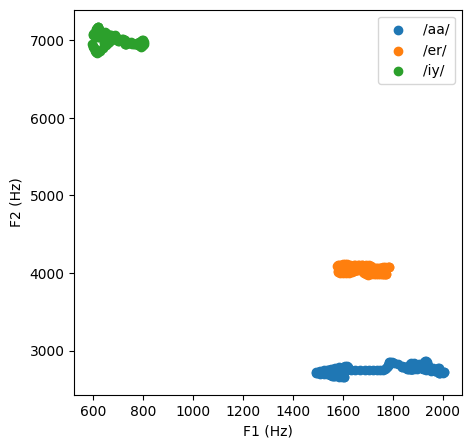

In [54]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.set(xlabel='F1 (Hz)')
ax.set(ylabel='F2 (Hz)')

# Let's remove coefficients toward the beginning and end of each sound.
# These coefficients correspond more to onsets/offsets or transitions
# rather than more 'pure' vowel sounds
frqs_aa=frqs_aa[int(frqs_aa.shape[0]*0.2):int(frqs_aa.shape[0]*0.8),:]
frqs_er=frqs_er[int(frqs_er.shape[0]*0.2):int(frqs_er.shape[0]*0.8),:]
frqs_iy=frqs_iy[int(frqs_iy.shape[0]*0.2):int(frqs_iy.shape[0]*0.8),:]

# now a scatter plot for each 'cluster' of formant positions
ax.scatter(frqs_aa[:,0],frqs_aa[:,1], label='/aa/')
ax.scatter(frqs_er[:,0],frqs_er[:,1], label='/er/')
ax.scatter(frqs_iy[:,0],frqs_iy[:,1], label='/iy/')
ax.legend();

**Comment on the results and the potential for characterisations of the vocal tract or filter configuration can be used for speech recognition.**

We can see that the different phonemes are linearly separable in frequency F1, F2 domain. This means that we can use these values to characterize each phonemes relatively easy. The frequencies describe the rate of the glottal cycle in the vocal tract. These frequencies are very different sounds.

--

Next, we're going to see how we might design a trivial classifier to recognise these different vowel sounds using the kmeans clustering algorithm.

/Users/julieschult/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


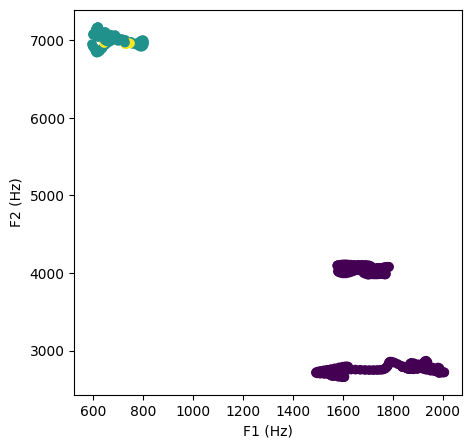

In [56]:
# let's stack the formant estimates for each sound into 
# a single matrix
#X = np.vstack((frqs_aa[:,0:2], frqs_er[:,0:2], frqs_iy[:,0:2])) #TRIMMED VERSION
X = np.vstack((frqs_aa, frqs_er, frqs_iy)) #FULL RECORRDING

# perform a kmeans clustering on the data
kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit(X).predict(X)

# and plot the resulting clusters
fig, ax = plt.subplots(figsize=(5, 5))
ax.set(xlabel='F1 (Hz)')
ax.set(ylabel='F2 (Hz)')
ax.scatter(X[:, 0], X[:, 1], c=labels);

**Describe how you would implement an automatic speech recognition system using such features.  How might it perform?**

K-means fits well for this as it is easy to divide the signal data into non-overlapping clusters. It would probably perform perfectly in this case, according to the plot.

--

**Repeat this exercise after adjusting the code to plot the same features for the full recordings (not the trimmed versions) and comment on the results.  How would an automatic speech recognition system perform now?  Do formant estimates make for suitable and sufficient features for speech recognition?  Can you think of how you might do better?**

When using the full recording, the clusters are no longer that easy to separate. Therefore it would no longer perform as good as before. The formants estimates are suitable features for speech recognition. 

# Feature extraction

We will look at a few different approaches to feature extraction that we might use for modelling and classification/recognition.  One involves the use of LPC coefficients.  We'll also look at Mel-scaling, at the liftering of DFT-derived spectra and cepstral processing.  Last, we'll look at feature correlation.

## Mel scaling
Using the short <tt>assassiner</tt> utterance from earlier, we will plot and compare the DFT-derived spectrogram of a speech signal to a Mel-scaled spectrogram.  

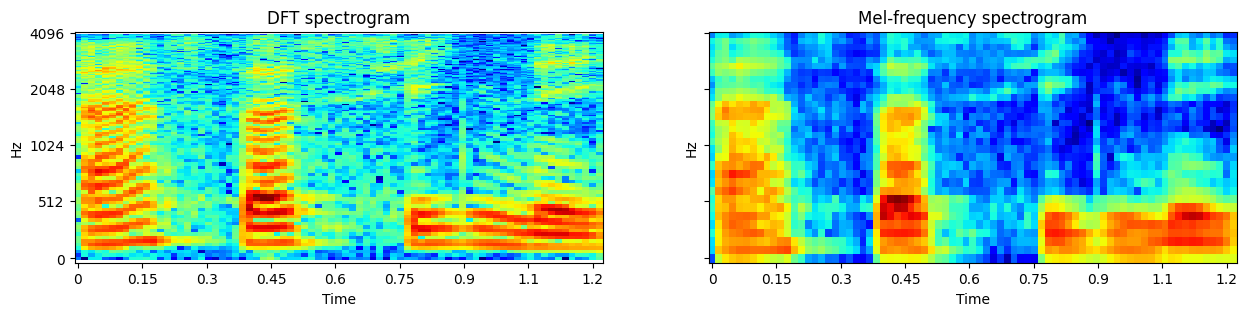

In [57]:
fig, ax = plt.subplots(ncols=2, sharey=True, figsize=(15, 3))

# plot the DFT spectrogram
S = np.abs(librosa.stft(assassine, n_fft=dn_fft, 
                        hop_length=dhop_length))
S_db = librosa.amplitude_to_db(S, ref=np.max)
librosa.display.specshow(S_db, n_fft=dn_fft, hop_length=dhop_length, 
                         sr=dsr, x_axis='time', y_axis='linear', 
                         ax=ax[0], cmap='jet')
ax[0].set(title='DFT spectrogram')

# plot the mel-scaled DFT spectrogram
S = librosa.feature.melspectrogram(
    y=assassine, sr=dsr, n_fft=dn_fft, hop_length=dhop_length, 
    n_mels=32, fmax=dsr/2)
S_dB = librosa.power_to_db(S, ref=np.max)
img=librosa.display.specshow(
    S_dB, n_fft=dn_fft, hop_length=dhop_length, x_axis='time', 
    y_axis='mel', sr=dsr, ax=ax[1], cmap='jet', fmax=dsr/2)
ax[1].set(title='Mel-frequency spectrogram');

**Plot Mel-spectrograms with different numbers of Mel filters and comment on the results.**

The Mel-frequency spectrogram shows more of the formant information compared to the LPC spectrogram and it keeps the formant information relatively equal to the DFT spectrogram. The information between the red areas is however deprecated.

--

Now let's look at the Mel-spectrogram of the earler linear chirp signal.  Again, we'll plot both the DFT spectrogram and the Mel-spectrogram.

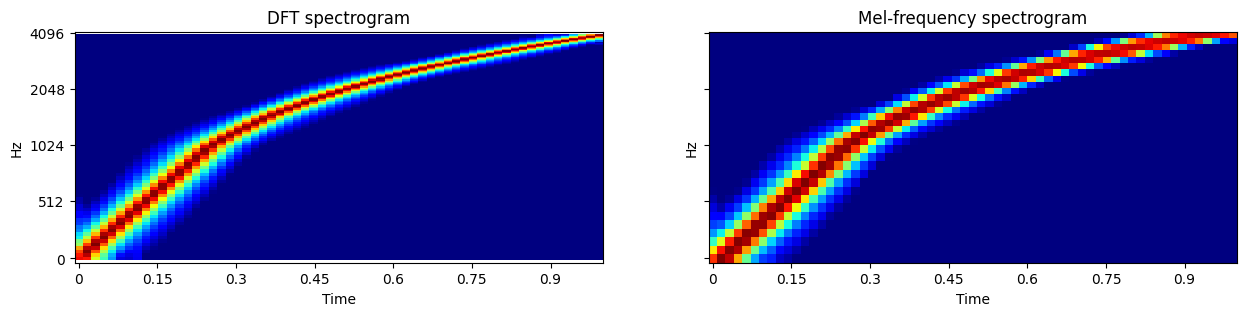

In [59]:
fig, ax = plt.subplots(ncols=2, sharey=True, figsize=(15, 3))

# plot the DFT spectrogram
S = np.abs(librosa.stft(linear_chirp, n_fft=dn_fft, 
                        hop_length=dhop_length))
S_db = librosa.amplitude_to_db(S, ref=np.max)
librosa.display.specshow(S_db, n_fft=dn_fft, hop_length=dhop_length,
                         sr=dsr, x_axis='time', y_axis='linear', 
                         ax=ax[0], cmap='jet')
ax[0].set(title='DFT spectrogram')

# plot the mel-scaled DFT spectrogram
S = librosa.feature.melspectrogram(
    y=linear_chirp, sr=dsr, n_fft=dn_fft, hop_length=dhop_length,
    n_mels=32, fmax=dsr/2)
S_db = librosa.power_to_db(S, ref=np.max)
img=librosa.display.specshow(
    S_db, n_fft=dn_fft, hop_length=dhop_length, x_axis='time', 
    y_axis='mel', sr=dsr, ax=ax[1], cmap='jet', fmax=dsr/2)
ax[1].set(title='Mel-frequency spectrogram');

**Explain the differences and their origins between the two spectrograms.**

The two spectograms seems to have a lot of similarities in terms of the form. We can notice is in the mel-frequency spectogram we can generally see more red and that the line or more "wide". This corresponds to the fact that we obtain the mel-frequency plot by mulitiplying  frequency-domain values by a filter bank that compute the average spectrum around each center frequency with increasing bandwiths. That’s why the energy at a certain frequency is spread over more time.

## Liftering

Now we're going to see how we lifter the DFT spectrogram.  It acts like a low pass filter and will produce a smoothed spectrogram without contamination from the fundamental frequency.  We'll plot and compared both spectrograms for the same <tt>assassiner</tt> utterance as earlier.

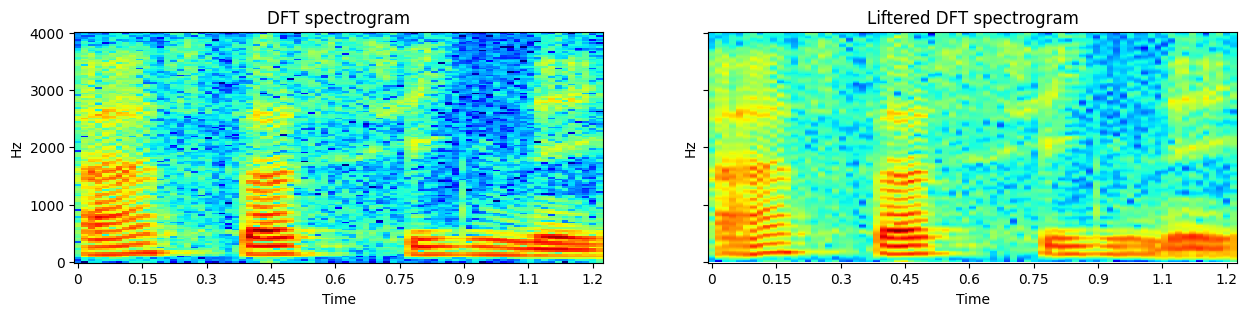

In [60]:
fig, ax = plt.subplots(ncols=2, sharey=True, figsize=(15, 3))

# compute and plot the DFT spectrogram
S = np.abs(librosa.stft(assassine, center=True, n_fft=dn_fft, 
                        hop_length=dhop_length))
S_db = librosa.amplitude_to_db(S, ref=np.max)                                                                  
librosa.display.specshow(
    S_db, n_fft=dn_fft, hop_length=dhop_length, sr=dsr, 
    x_axis='time', y_axis='linear', ax=ax[0], cmap='jet')
ax[0].set(title='DFT spectrogram')

# compute the cepstrogram using the DCT
C = scipy.fft.dct(np.log(S**2), axis=0)
# do the liftering
C = C[0:60,:]   # <-- change this to observe the effect
                # with different numbers of cepstral coefficients
    
# now invert the DCT
iC = scipy.fft.idct(C, n=256, axis=0)
# and recover the magnitude
S_hat = np.sqrt(np.exp(iC))

# plot the liftered spectrogram
S_hat_db = librosa.amplitude_to_db(S_hat, ref=np.max)                                                                  
librosa.display.specshow(
    S_hat_db, hop_length=dhop_length, sr=dsr, x_axis='time', 
    y_axis='linear', ax=ax[1], cmap='jet')
ax[1].set(title='Liftered DFT spectrogram');

**Observe and comment on the effect with different liftering parameters, in other words fewer and fewer cepstral coefficients. At some point, the fundamental frequency harmonics will disappear. At what point (number of retained cepstral coefficients after litering) does this occur?  Can you explain this?**

Below 35 ceptral coefficients make it really hard to see the (number of) harmonics. This is because this is a low-pass lifter, which removes higher-frequency components (above a certain cut-off frequency) and preserves lower-frequency components. The higher-frequency components are the harmonics.

--


To help us understand what is happenning here, we'll look at plots of the cepstral coefficients for a single frame of speech, and the corresponding spectrum before and after liftering.  As before, we'll initially select a frame at random.  You can also specify a specific interval.

Plotting spectrum at approximately 0.28 seconds
Frame number 22 of 37


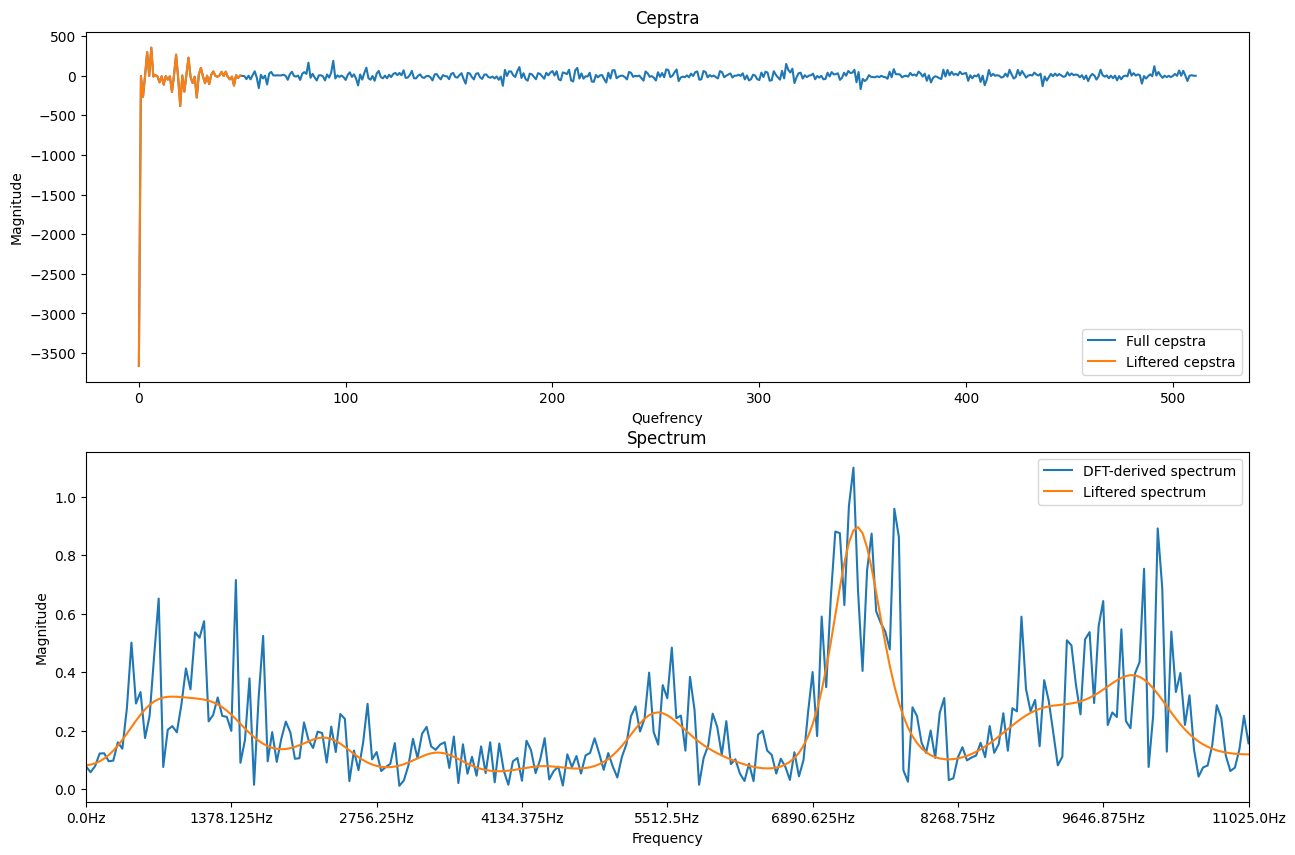

In [67]:
t = random.uniform(0, 1)*len(y)/sr 
# uncomment and change the following to whatever time instant for 
# which you want to plot the spectrum
#t = 0.03
print('Plotting spectrum at approximately', 
      "{:.2f}".format(t), 'seconds')

# we'll use a slight larger dft window and hop size than the default
frame_length=512
hop_length=256

# extract a frame at this time instant
frames=librosa.util.frame(
    assassine, frame_length=frame_length, hop_length=hop_length)
frame_idx=int(t/(len(assassine)/sr)*frames.shape[1])
frame_data=frames[:,frame_idx]
print('Frame number', frame_idx, 'of', frames.shape[1])

fig, ax = plt.subplots(nrows=2, figsize=(15, 10))
x_tick_pos=[n for n in range(
    0, frame_length //2 +1, frame_length // 16)]
x_tick_lbl=[str(sr / frame_length * n) + 'Hz' for n in x_tick_pos]
ax[1].set_xticks(x_tick_pos)
ax[1].set_xticklabels(x_tick_lbl)
ax[1].set_xlim([0, frame_length/2])

# compute the dft-derived magnitude spectrum
dft_spectrum=np.abs(scipy.fft.fft(frame_data, n=frame_length))
ax[1].plot(dft_spectrum, label='DFT-derived spectrum')

# compute cepstra using the DCT
C = scipy.fft.dct(np.log(dft_spectrum**2))
# do the liftering
C_l = C[0:50]   # <-- change this to observe the effect with 
                # different numbers of cepstral coefficients
ax[0].plot(C, label='Full cepstra')
ax[0].plot(C_l, label='Liftered cepstra')
ax[0].set(title='Cepstra', xlabel='Quefrency', ylabel='Magnitude')
ax[0].legend()  # the second profile is just a truncated version
                # of the first

# now invert the DCT
iC = scipy.fft.idct(C_l, n=frame_length)  # we still want to 
                                      # recover 256 components
# recover and plot the magnitude
dft_spectrum_hat = np.sqrt(np.exp(iC))
ax[1].plot(dft_spectrum_hat, label='Liftered spectrum')
ax[1].set(title='Spectrum', xlabel='Frequency', ylabel='Magnitude')
ax[1].legend();

**Explain how cepstral coefficients are extracted and the importance of using a logorthim.  Plot the cepstra for an interval of voiced speech and estimate the fundamental frequency. For plots corresponding to intervals of voice speech, you should be able to identify a component that corresponds to the fundamental frequency.  You should then be able to set the number of retrained cepstral coefficients to either remove or retain it.  Determine the maximum possible number of cepstral coefficients for which the fundamental frequency is still *removed*.  Then, explain the characteristics which differentiate voiced and unvoiced sounds in the quefrency domain.**

* Cepstral coefficients are extracted by firstly applying the DFT, and then taking the log of the magnitude. The frequencies are warped on a Mel-scale, and lastly applying the inverse DCT. The importance of using the algorithm is to be able to transform the filterbank outputs into the cepstral domain.
* The maximum possible number of cepstral coefficients is 25, lower than this will make it difficult to determine the fundamental frequency.
* In the quefrency domain, we can determine if a sound is voiced or unvoiced speech by looking at the magnitude of the lower order cepstral coefficients. There will be clear peaks around 0 when the speech signal is voiced. For unvoiced, the magnitude is generally low for the whole cepstrum. Voiced speech signals have a harmonic structure, a periodic waveform in the cepstrum.

--

**Comment on the similarities and differences between DFT, LPC and liftered spectra.**
* DFT is used for spectral analysis and manipulation, LPC is for modeling and characterizing speech signals, and liftering is used to modify or enhance specific spectral features extracted from the speech signal. The similarities between the techniques is that they all involve transforming the signal into a different domain to extract relevant features or information.

## Correlation

We will now explore the correlation in Mel-scaled filterbank, linear predictive coding and cepstral coefficients across an entire utterance.  Try to understand the implications of correlation when features are used for modelling and classification/recognition.  We're going to extract 14 coefficients in each case, with a common framing configuration.

In [62]:
# the same parameterisation for each feature
frame_length=512
hop_length=256
n_coeffs=14

# Mel-scaled filterbank coefficients
mel_S = librosa.feature.melspectrogram(
    y=assassine, sr=dsr, n_fft=frame_length, hop_length=hop_length,
    n_mels=n_coeffs, fmax=dsr/2, center='False')

# LPC coefficients
[a, g, e] = lpc.lpcfit(assassine, n_coeffs, h=hop_length,
                       w=hop_length)
a=a[:,1:n_coeffs+1].T    # remove the extra a_0=1 coeff

# Mel-scaled cepstral coefficients
mfcc_S = librosa.feature.mfcc(
    y=assassine, sr=dsr, n_fft=frame_length, 
    hop_length=hop_length, n_mfcc=n_coeffs)

Now we'll estimate correlation matrices for each feature, plot them, and estimate the mean correlation coefficient in each case.

Mean correlation coefficient for Mel-scaled filterbank coefficients is  0.6248
Mean correlation coefficient for LPC coefficients is                    0.3633
Mean correlation coefficient for Mel-scaled cepstral coefficients is    0.3588


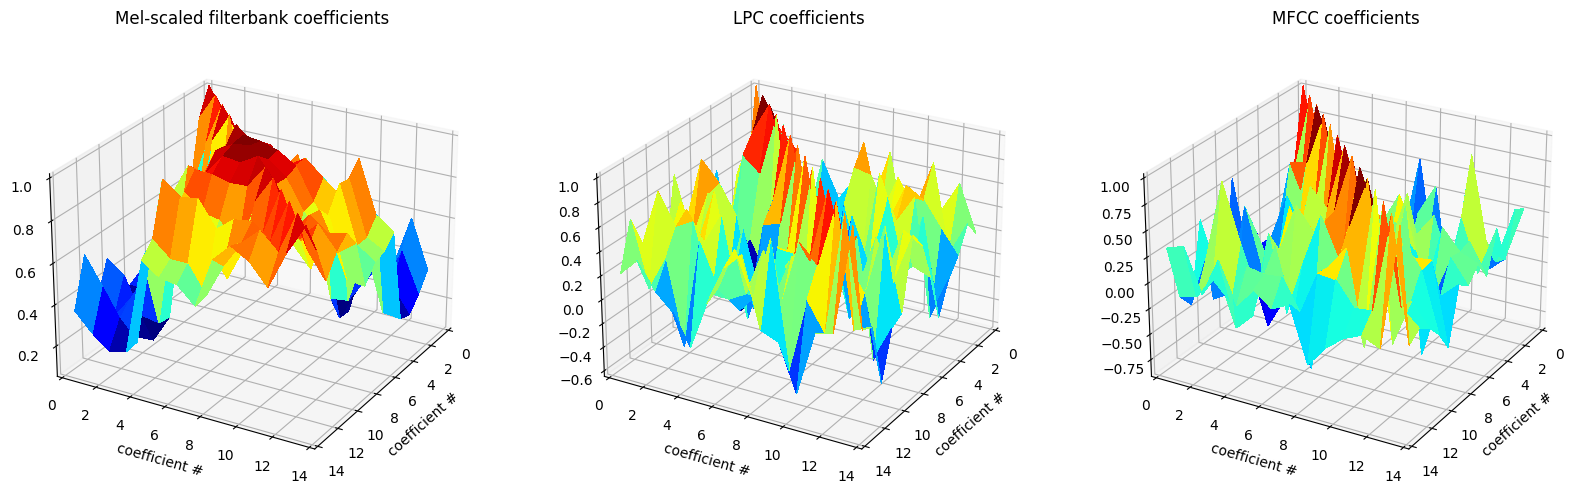

In [63]:
# set up the meshgrid
X = np.arange(0, n_coeffs, 1)
Y = np.arange(0, n_coeffs, 1)
X, Y = np.meshgrid(X, Y)

# Plot the correlation matrices
fig, ax = plt.subplots(ncols=3, subplot_kw={"projection": "3d"}, 
                       figsize=(20, 10))
surf = ax[0].plot_surface(X, Y, numpy.corrcoef(mel_S), 
                          cmap='jet', linewidth=0, antialiased=False)
surf = ax[1].plot_surface(X, Y, numpy.corrcoef(a), cmap='jet', 
                          linewidth=0, antialiased=False)
surf = ax[2].plot_surface(X, Y, numpy.corrcoef(mfcc_S), cmap='jet', 
                          linewidth=0, antialiased=False)
ax[0].set_xlim(0, 14);ax[1].set_xlim(0, 14);ax[2].set_xlim(0, 14)
ax[0].set_ylim(0, 14);ax[1].set_ylim(0, 14);ax[2].set_ylim(0, 14)
ax[0].view_init(25, 30); ax[1].view_init(25, 30); ax[2].view_init(25, 30)
ax[0].set(title='Mel-scaled filterbank coefficients', 
          xlabel='coefficient #', ylabel='coefficient #')
ax[1].set(title='LPC coefficients', xlabel='coefficient #', 
          ylabel='coefficient #')
ax[2].set(title='MFCC coefficients',xlabel='coefficient #',
          ylabel='coefficient #')

# now calculate the mean correlation
# for Mel-scaled filterbank coefficients
xc=np.abs(np.corrcoef(mel_S)).mean()
print(
    'Mean correlation coefficient for Mel-scaled filterbank coefficients is ',
    "{:.4f}".format(xc))
# for LPC coefficients
xc=np.abs(np.corrcoef(a)).mean()
print(
    'Mean correlation coefficient for LPC coefficients is                   ',
    "{:.4f}".format(xc))
# for MFCC coefficients
xc=np.abs(np.corrcoef(mfcc_S)).mean()
print(
    'Mean correlation coefficient for Mel-scaled cepstral coefficients is   ',
    "{:.4f}".format(xc))

**Explain which features, among the three choices, might be best for modelling and why.**

* The mean correlation coefficient for the Mel-scaled filterbank is the highest, which tells us that there is a strong linear relationship between the variables. This can be useful for linear regression tasks, where we want to model a linear dependency. The choice of features is however very dependent on the application or task, and the other two correlation coefficients might still be good for modelling.


# Dynamic time warping (DTW)

We will use DTW to regenerate the same examples shown during your lectures using two renditions of the utterance '*cottage cheese with chives is delicious*', one shorter, one longer.

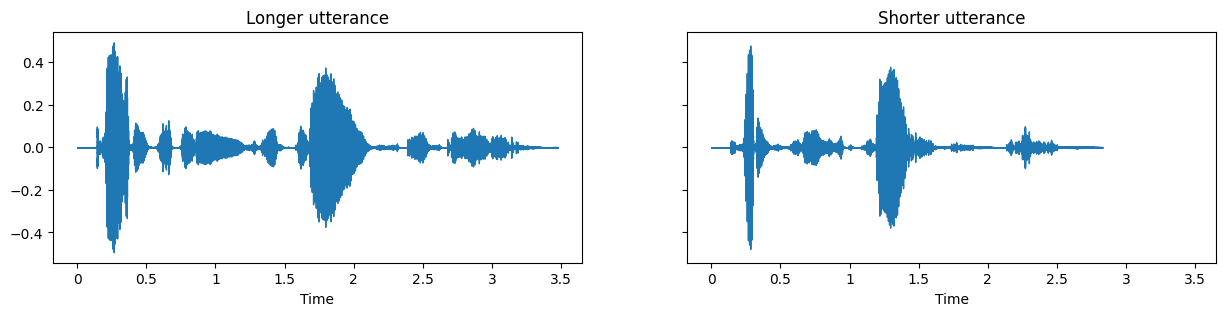

In [68]:
y_long, sr1 = librosa.load('sm1_cln.wav', sr=dsr)
y_short, sr2 = librosa.load('sm2_cln.wav', sr=dsr)

# plot the time waveforms
fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(15, 3))

librosa.display.waveshow(y_long, sr=sr1, ax=ax[0])
ax[0].set(title='Longer utterance')
ax[0].label_outer()

librosa.display.waveshow(y_short, sr=sr2, ax=ax[1])
ax[1].set(title='Shorter utterance');

Listen to the longer utterance.

In [71]:
IPython.display.Audio(data=y_long, rate=sr1)

And now the second, shorter utterance.

In [70]:
IPython.display.Audio(data=y_short, rate=sr2)

## Addition and linear warping
If we compare these two utterances directly, with no alignment, then we stand to compare dissimilar speech units as can be perceived in the following example whereby the two sound files are simply added together.

In [72]:
y_long_pad = np.pad(y_long,(
    0,max(y_long.size,y_short.size)-y_long.size),mode='constant')
y_short_pad = np.pad(y_short,(
    0,max(y_long.size,y_short.size)-y_short.size),mode='constant')
y_sum = y_long_pad + y_short_pad
IPython.display.Audio(data=y_sum, rate=sr2)

Of course, even the duration of the two utterances is different.  We could resample the shorter utterance in linear fashion to align it with the longer utterance in terms of duration. We'll do this by resynthesising a linearly warped utterance from complex spectral estimates.

In [73]:
# compute the STFT of both utterances
S_long = librosa.stft(y_long, n_fft=dn_fft, hop_length=dhop_length)
S_short = librosa.stft(y_short, n_fft=dn_fft, hop_length=dhop_length)

# determine the number of frames in the longest utterance
l=max(S_long.shape[1], S_short.shape[1])

# determine the frame indices that warp the shorter utterance 
# to the same length as the longer utterance - we'll do this
# for both utterances in case you change/swap them
i_short = np.zeros(l)
i_long = np.zeros(l)
for i in range(l):
    i_short[i] = i/l*S_short.shape[1]
    i_long[i] = i/l*S_long.shape[1]

# resynthesize from the re-sampled STFT
S_long_warp = librosa.phase_vocoder(S_long[:,i_long.astype(int)],
                                    rate=1.0, hop_length=dhop_length)
y_long_warp = librosa.istft(S_long_warp, hop_length=dhop_length)
S_short_warp = librosa.phase_vocoder(S_short[:,i_short.astype(int)],
                                     rate=1.0, hop_length=dhop_length)
y_short_warp = librosa.istft(S_short_warp, hop_length=dhop_length)

Now we can listen again to the summed version of the two utterances, this time using the warped (stretched) shorter utterance.

In [74]:
y_sum = y_long_warp + y_short_warp
IPython.display.Audio(data=y_sum, rate=sr2)

While the utterances are aligned in terms of duration, we did not compensate for differences in the speaker rate and speech endpoints, for instance, meaning that we are still comparing dissimilar sounds.  We need to align the utterances so that we compare meaningfully-similar speech sounds.  We will now do this using DTW. 

## Dynamic warping
We'll use Mel-scaled frequency cepstral coefficients (MFCCs) as the representation but you could alter the code to use LPC coefficients, Mel-scaled filterbank outputs or even any other representation of your choosing. We will further use type 1 local continuity constraints and a cosine distance metric.  You can adjust the code easily to investigate the use of different constraints and distance metrics.

In [81]:
# extract the mfcc coefficients for both utterances
n_coeffs=14
y_long_mfcc = librosa.feature.mfcc(
    y=y_long, sr=sr1, n_fft=dn_fft, hop_length=dhop_length, 
    n_mfcc=n_coeffs)
y_short_mfcc = librosa.feature.mfcc(
    y=y_short, sr=sr2, n_fft=dn_fft, hop_length=dhop_length,
    n_mfcc=n_coeffs)

# type 1 local continuity constraints - you can change these to another type
step_sizes_sigma = np.array([[1, 0], [0, 1], [1, 1]])

# create and plot the matrix of local distances
d = scipy.spatial.distance.cdist(
    y_long_mfcc.T, y_short_mfcc.T, metric='cosine')

# compute the dynamic alignment using the the local distances
D_A, wp = librosa.sequence.dtw(C=d, step_sizes_sigma=step_sizes_sigma)
wp_s = librosa.frames_to_time(wp, sr=sr1, hop_length=dhop_length)

Matrices <tt>d</tt> and <tt>D_A</tt> are the matrix of local distances and accumulated distances/costs respectively. <tt>wp</tt> contains the warping paths for each utterance.  We can plot all three as in your lecture slides.

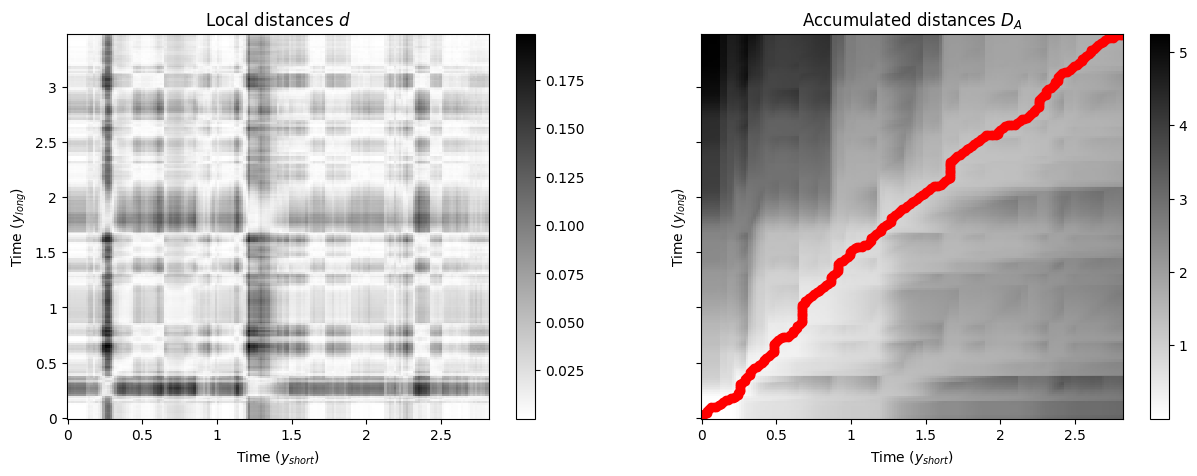

In [76]:
fig, ax = plt.subplots(ncols=2, sharey=True, figsize=(15, 5))

# plot the local distances
img = librosa.display.specshow(
    d, x_axis='time', y_axis='time', sr=sr1, cmap='gray_r', 
    hop_length=dhop_length, ax=ax[0])
ax[0].set(title='Local distances $d$', xlabel='Time $(y_{short})$',
          ylabel='Time $(y_{long})$')
fig.colorbar(img, ax=ax[0]);

# plot the accumulated distance matrix and the warping path
img = librosa.display.specshow(
    D_A, x_axis='time', y_axis='time', sr=sr1, cmap='gray_r', 
    hop_length=dhop_length, ax=ax[1])
ax[1].plot(wp_s[:, 1], wp_s[:, 0], marker='o', color='r')
ax[1].set(title='Accumulated distances $D_A$',
       xlabel='Time $(y_{short})$', ylabel='Time $(y_{long})$')
fig.colorbar(img, ax=ax[1]);

Change the local continuity constratints and observe the differences in the optimal warping path.

We'll now look at the dynamic nature of the warping path and see how it acts to ensure the comparison of similar speech units in deriving the global distance.

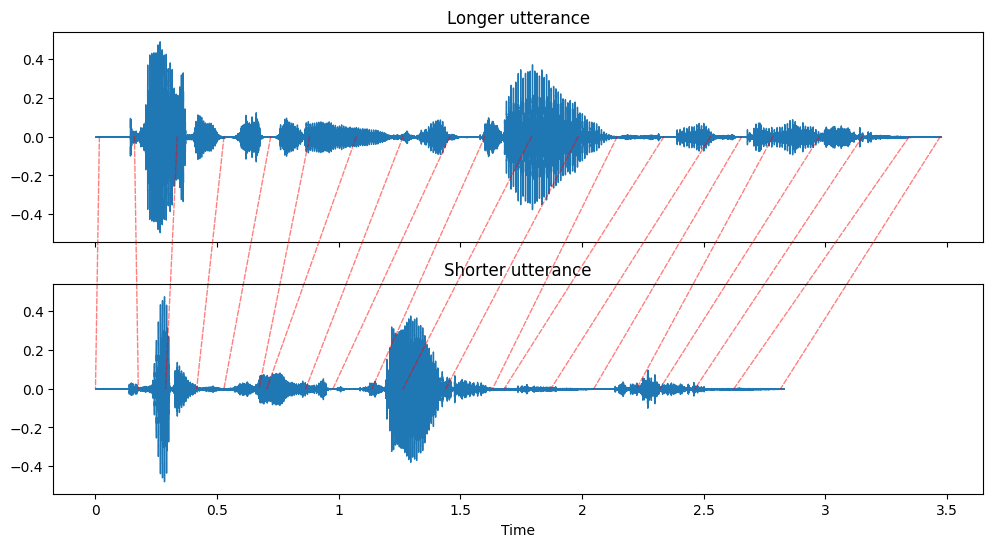

In [77]:
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=(12, 6))

# y_long
librosa.display.waveshow(y_long, sr=sr1, ax=ax[0])
ax[0].set(title='Longer utterance')
ax[0].label_outer()

# y_short
librosa.display.waveshow(y_short, sr=sr2, ax=ax[1])
ax[1].set(title='Shorter utterance')

n_arrows = 20
for tp1, tp2 in wp_s[::len(wp_s)//n_arrows]:
    # Create a connection patch between the aligned time points in each subplot
    con = ConnectionPatch(xyA=(tp1, 0), xyB=(tp2, 0),
                          axesA=ax[0], axesB=ax[1],
                          coordsA='data', coordsB='data',
                          color='r', linestyle='--',
                          alpha=0.5)
    ax[1].add_artist(con)

The dashed red lines in the above plot show that DTW aligns the two utterances in a dynamic fashion, adjusting for differences in the inter-utterance speaking rates.  We can also plot the two warped utterances to check the alignment.

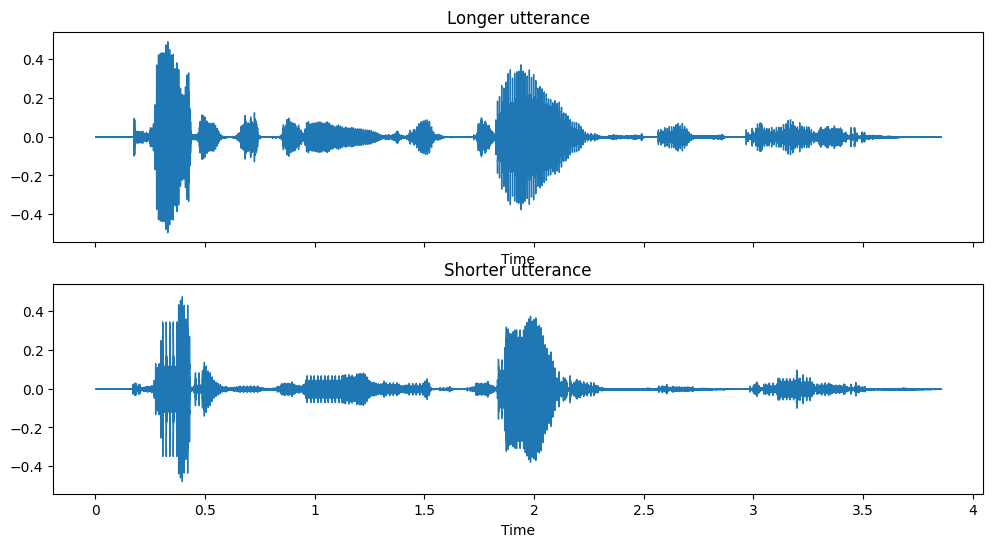

In [78]:
# resynthesize from the re-sampled STFT now according to the 
# non-linear, dynamic warping paths
S_long_warp = librosa.phase_vocoder(
    S_long[:,numpy.flip(wp[:,0])], rate=1.0, hop_length=dhop_length)
y_long_warp = librosa.istft(S_long_warp, hop_length=dhop_length)
S_short_warp = librosa.phase_vocoder(
    S_short[:,numpy.flip(wp[:,1])], rate=1.0, hop_length=dhop_length)
y_short_warp = librosa.istft(S_short_warp, hop_length=dhop_length)

fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=(12, 6))

# y_long
librosa.display.waveshow(y_long_warp, sr=sr2, ax=ax[0])
ax[0].set(title='Longer utterance')

# y_short
librosa.display.waveshow(y_short_warp, sr=sr2, ax=ax[1])
ax[1].set(title='Shorter utterance');

Now we see that both utterances are at least visually aligned in the time series.  We'll now listen to the sum of the two warped utterances as a final check that the alignment is as expected.

In [79]:
y_sum = y_long_warp + y_short_warp
IPython.display.Audio(data=y_sum, rate=sr2)

If the alignment is effective, you shoud almost hear only a single utterance. 

Last, we can look at the accumlated distance under DTW.  It is not important here, but it is the distance/cost we would use if we were performing classification.

In [80]:
print('Total accumulated distance/cost is', "{:.4f}".format(D_A[-1,-1]))

Total accumulated distance/cost is 1.7091


# Hidden Markov modelling

We're going to study the very simple example that we studied in your lectures, namely a trivial speech activity detection problem.  We'll use the <tt>hmmlearn</tt> library to do this. It implements solutions to the three, core HMM problems we've studied and you should be able to use it to reproduce the same or similar results that you derived yourselves, so long as you initialise the HMM with the same parameters $\lambda=(\pi, A, B)$.

Let's set up the initial HMM parameters for a two-state HMM.

In [120]:
# define and name the states
states = ["non-speech", "speech"]
n_states = len(states)

# define and name the observations
observations = ["A", "B", "C"]
n_observations = len(observations)

# define the discrete HMM - n_components is the number of states
model = hmm.CategoricalHMM(
    n_components=n_states, verbose=True, algorithm='viterbi',
    n_iter=1000, params='ste', init_params='', random_state=14)

# starting state probabilities
pi = np.array([1.0, 0.0])
model.startprob_ = pi

# transition probabilities
A = np.array([[0.7, 0.3],
              [0.3, 0.7]])
model.transmat_ = A

# emission probabilities 
B = np.array([[0.7, 0.1, 0.2],
              [0.1, 0.5, 0.4]])
model.emissionprob_ = B

The HMM is now defined and initialised with some ad-hoc parameters. We will now suppose an observation sequence.

In [121]:
# define an observation sequence
X = np.atleast_2d([0,1,2,0]).T
print("Observations:", ", ".join(map(lambda x: observations[int(x)], X)))

Observations: A, B, C, A


Given this observation sequence, we'll now compute the most probable state sequence and the corresponding probability.

In [122]:
# decode - this is the probability of the state sequence, so Viterbi.  
# It is not the forward algorithm
X_hat = model.decode(X)

# now determine the state labels to which this sequence corresponds
print("State sequence:", ", ".join(map(lambda x: states[int(x)], X_hat[1])))
print("Log probability of the produced state sequence:", 
      "{:.2f}".format(X_hat[0]))

State sequence: non-speech, speech, speech, non-speech
Log probability of the produced state sequence: -5.09


The log probability is $P(O,q|\lambda)$.  Notice the difference between this and the probability of this sequence given the model $P(O|\lambda)$ as computed using the forward sequence.  We can estimate that as well.

In [123]:
original_model_score=model.score(X)
print("Log probability under the original model:", 
      "{:.2f}".format(original_model_score))

Log probability under the original model: -4.09


In the example we studied in class, we assumed the precise, known state sequence and estimated a new model based upon this assumed sequence.  In practice, we do not *know* the exact sequence and would adjust the model while taking into account every possible state sequence.  We can do this by *fitting* the model to the observations.  For this trivial example, the model should converge to the same model we produced in the lecture example.

Let's fit a new model (initialised with the original configuration) to the observations.

In [125]:
# the new HMM
new_model = hmm.CategoricalHMM(
    n_components=n_states, verbose=True, algorithm='viterbi',
    n_iter=10, params='ste', init_params='', random_state=14)
new_model.startprob_ = pi
new_model.transmat_ = A
new_model.emissionprob_ = B
new_model.fit(X);

Fitting a model with 7 free scalar parameters with only 4 data points will result in a degenerate solution.
         1      -4.09105398             +nan
         2      -3.70272301      +0.38833098
         3      -3.46232192      +0.24040109
         4      -3.25084891      +0.21147301
         5      -3.03333881      +0.21751010
         6      -2.85663740      +0.17670141
         7      -2.78775899      +0.06887841
         8      -2.77760045      +0.01015854
         9      -2.77507750      +0.00252296


And now let's see the resulting, updated model paramters.  Here are the new $\pi$ matrix.

In [126]:
print(new_model.startprob_)

[1. 0.]


Which is the same as before.  This is to be expected since we only have a single observation sequence and this sequence starts in the non-speech state.  Now for the updated transition matrix $A.$

In [127]:
print(new_model.transmat_)

[[2.28530944e-15 1.00000000e+00]
 [4.98751268e-01 5.01248732e-01]]


This is very close to the example in lectures in which there are no transitions from the non-speech to non-speech state, hence the probability of this transition is almost zero.  Last, here's the emission probability matrix, $B.$

In [128]:
print(new_model.emissionprob_)

[[9.99999999e-01 1.75730482e-19 1.48089207e-09]
 [1.24717652e-03 4.99376412e-01 4.99376411e-01]]


Which is again close to the result for the lecture example.  Last, let's check that $P(O|\lambda)$ is now higher for the new model than it was for the orignal model.

In [129]:
print("Log probability under the original model:", 
      "{:.2f}".format(original_model_score))
new_model_score=new_model.score(X)
print("Log probability under the new model:     ", 
      "{:.2f}".format(new_model_score))

Log probability under the original model: -4.09
Log probability under the new model:      -2.77


Which is indeed higher, showing that our model has converged to a configuration which (locally) maximises $P(O|\lambda)$ for the given training data.

**Briefly describe how you would design an automatic speech recognition system to distinguish between "On" and "Off" utterances using HMMs.**

Here are the steps to designing an ASR system to distinguish between two utterances using Hidden Markov Models.
* Data collection and labeling: Collect a dataset of recordings of both "on" and "off" from various speakers (different gender, age etc.). Manually annotate the audio data to indicate the segments.
* Preprocessing (if needed): Depending on the data, preprocessing techniques might be necessary to accurately model speech. This includes removing noise and/or enhancing relevant information.
* Feature extraction: Extract features from the preprocessed audio. Examples of features to be extracted are Mel-frequency cepstral coefficients and log energy.
* Model training: We would need to define the topology of the model, for example left-to-right with three states. Initialization of the model parameters, like transition probabilities and initial state probabilities. The topology and initialization of the model would have to be designed using a collection of different assumptions about the data. When the parameters are initialized and the structure of the model is chosen, we would choose an algorithm for maximizing $P(O|\lambda)$, for example the Viterbi algorithm.
* Decoding: Apply the Viterbi algorithm to decode the most likely sequence of the states. This sequence corresponds to the segments ("on" and "off").
* Evaluation and Optimization: Lastly, we evaluate the performance of the model using log probability for example. Now, we can optimize the model by adjusting the transition probabilities and initial parameters and most likely further improve out results.